In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}

import sys
sys.path.append(os.path.join(os.getcwd(), "functions"))
import helper_functions as hfn
import AIC_functions as aicfn
import plotting_functions as plotfn
import bootstrap_functions as bstfn

# seed random

In [2]:
np.random.seed(0)

In [3]:
numB = 5000 # number of bootstraps

# define paths and save paths 

In [4]:
path = os.getcwd()

pathdata = os.path.join(path, 'data')

datapath = os.path.join(pathdata, 'clean')

In [5]:
savepath = os.path.join(path, 'compare_linfit_params')
hfn.dir_check(savepath)

savepath_dataset = os.path.join(savepath, 'dataset')
hfn.dir_check(savepath_dataset)
savepath_all = os.path.join(savepath, 'all_targets')
hfn.dir_check(savepath_all)
savepath_v1pm = os.path.join(savepath, 'v1_pm')
hfn.dir_check(savepath_v1pm)

# import data

In [6]:
areas, areas_with_pre, df_raw, df_all, df_v1, df_pm = hfn.import_main_dataset(datapath)

In [7]:
print (areas)

['PTLp', 'TEa', 'VIS', 'AUD', 'RSP', 'Thal', 'Thal_noLGd', 'Dist_ctx', 'VISp', 'VISpm', 'VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA']


In [8]:
df_raw.head()

,name,pre,input,target area,strain,group,starter,ratio_target_all,area,keep,...,RSPd,RSPv,AM,LD,LP,LGd,ORB,ACA,MOs,CLA
0,BRAC2704_6c,2860,2729,V1,RETRO,10,2,1.0,PM/V1,1,...,100,172,23,82,7,268,59,69,42,2
1,ERAD25_1a,2548,2451,V1,GLT,1,3,1.0,V1,1,...,85,219,11,158,100,168,14,11,15,5
2,ERAD25_1b,9059,8418,PM,GLT,2,8,1.0,PM,1,...,670,1003,177,411,1041,193,312,118,33,45
3,BRAC2704_6d,8465,7486,V1,RETRO,10,13,1.0,V1,1,...,602,901,163,205,61,249,137,377,153,42
4,ERAE26_6e,7223,6860,PM,RBP,9,16,1.0,V1,1,...,552,497,26,197,576,191,246,93,50,32


In [9]:
# log10 transformed datasets
df_log_all = hfn.make_log_df_full(df_all, areas)
df_log_v1 = hfn.make_log_df_full(df_v1, areas)
df_log_pm = hfn.make_log_df_full(df_pm, areas)

In [10]:
hfn.save_dflist_to_csv([df_all, df_v1, df_pm, df_log_all, df_log_v1, df_log_pm], ['df_all', 'df_v1', 'df_pm', 'df_log_all', 'df_log_v1', 'df_log_pm'], savepath_dataset)

# Bootstrap residuals from linear fit

### first for LGd (natural scale)

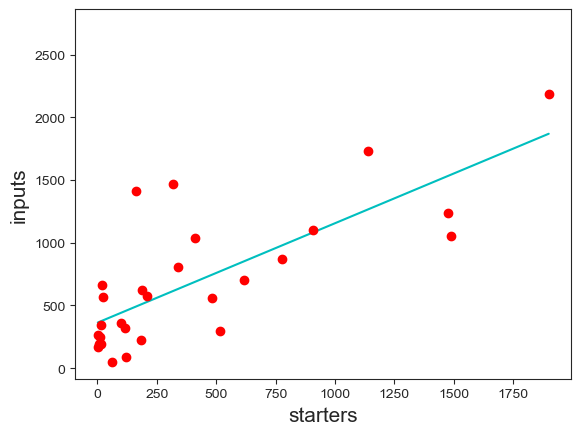

In [11]:
df_boot_int_all_lin, df_boot_slope_all_lin, df_CI95_int_all_lin, df_CI95_slope_all_lin = bstfn.bootstrap_res_and_save2(['LGd'], df_all,  0,  'all_targets_lin', savepath, savepath_all, numB)

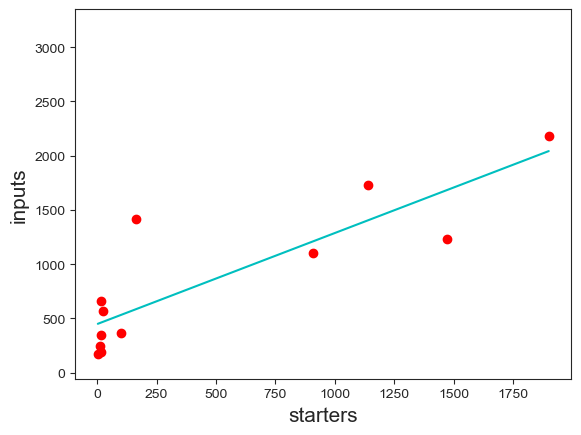

In [12]:
df_boot_int_v1_lin, df_boot_slope_v1_lin, df_CI95_int_v1_lin, df_CI95_slope_v1_lin = bstfn.bootstrap_res_and_save2(['LGd'], df_v1, 0, 'targets_V1_lin', savepath, savepath_v1pm, numB)

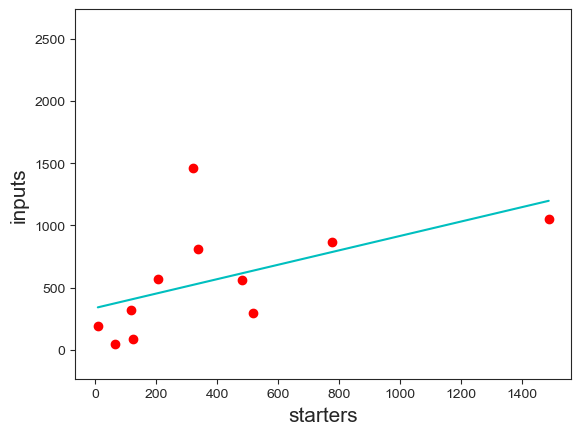

In [13]:
df_boot_int_pm_lin, df_boot_slope_pm_lin, df_CI95_int_pm_lin, df_CI95_slope_pm_lin =bstfn.bootstrap_res_and_save2(['LGd'], df_pm, 0, 'targets_PM_lin', savepath, savepath_v1pm, numB)

### Then for all areas (log scale)

/Users/rancze/Documents/GitHub/Tran_Van_Minh_et_al_2023/functions/bootstrap_functions.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


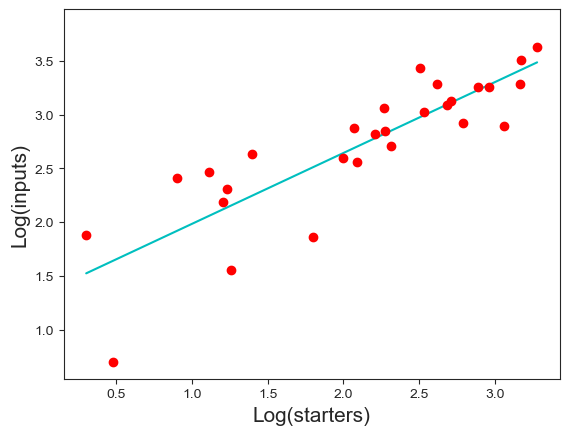

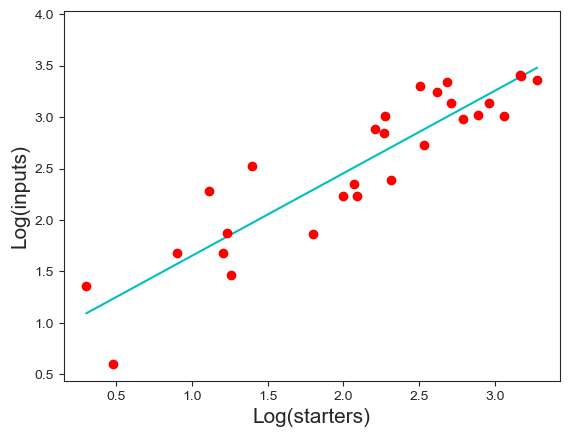

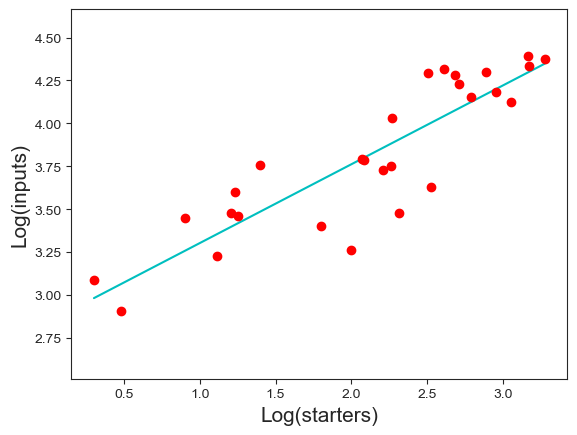

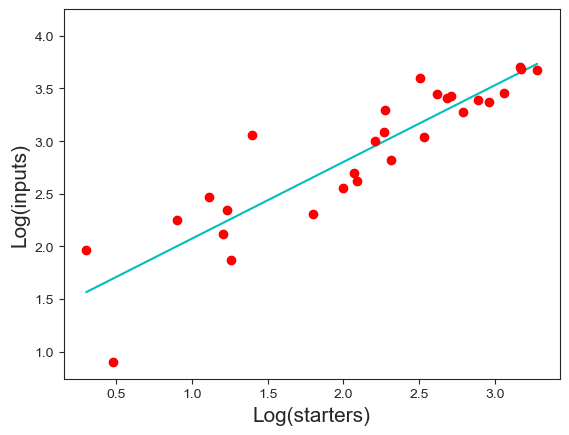

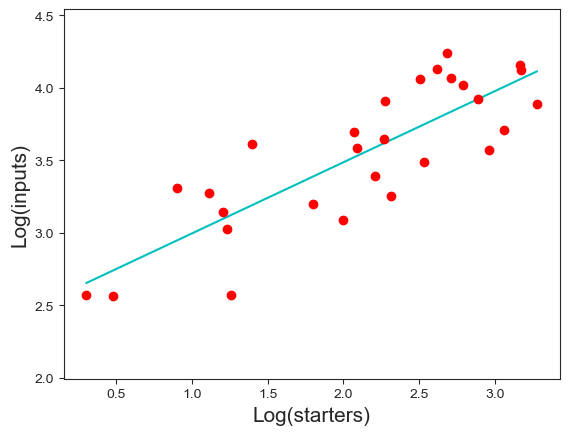

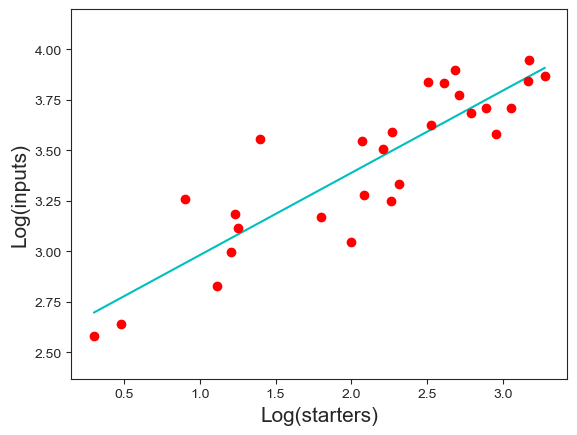

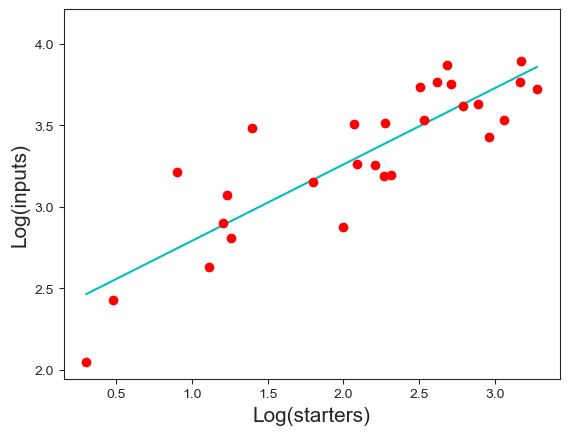

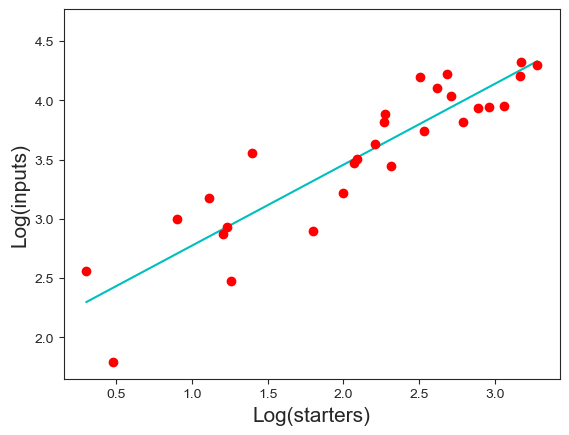

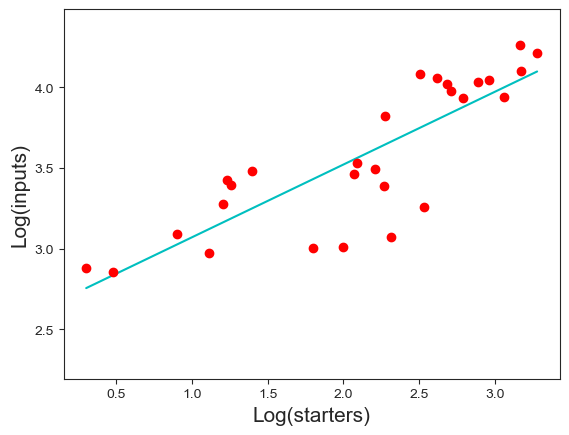

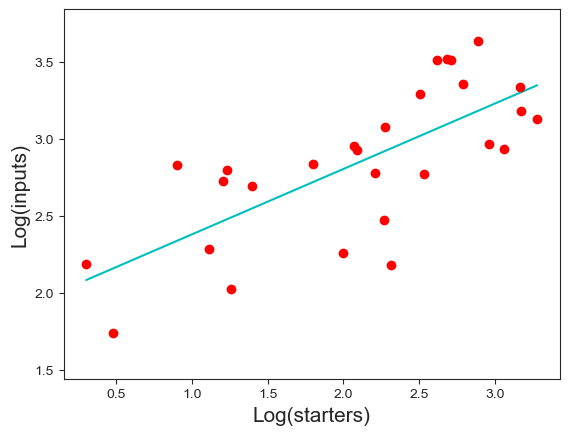

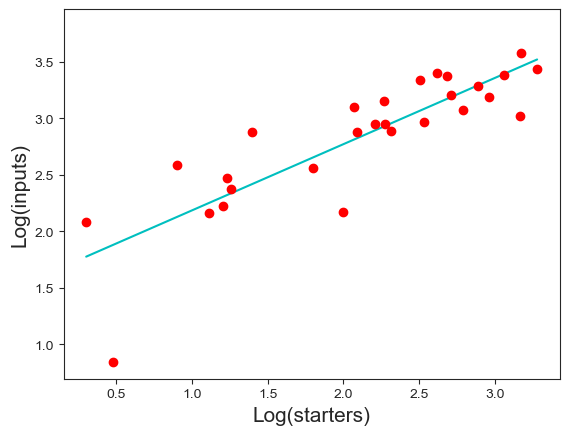

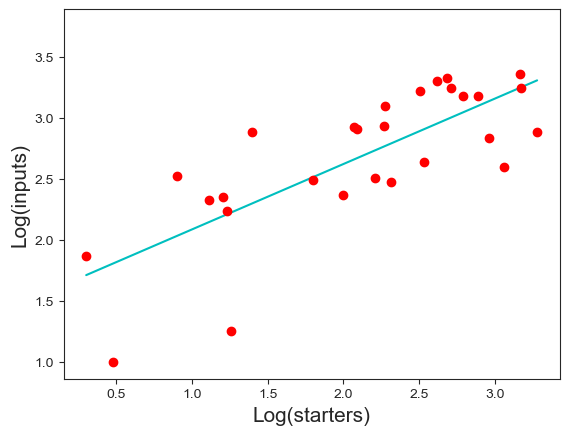

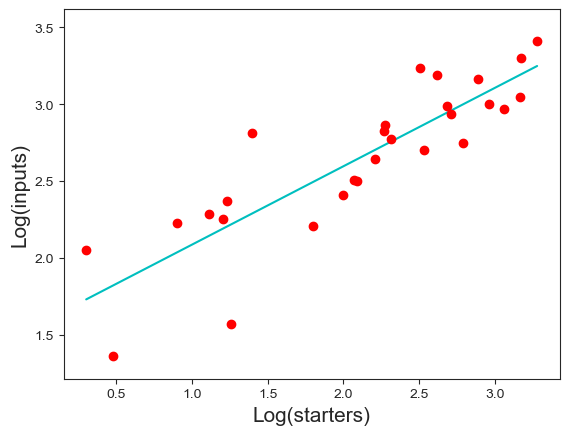

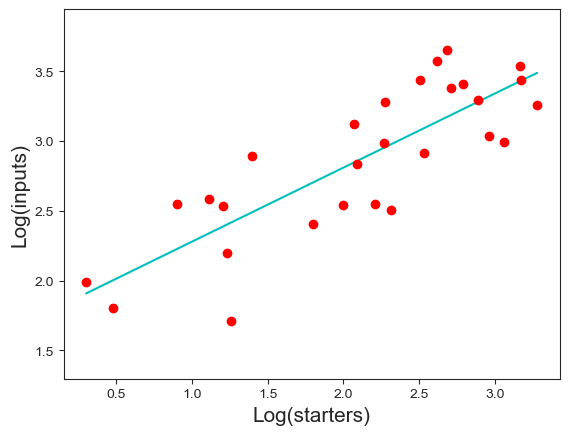

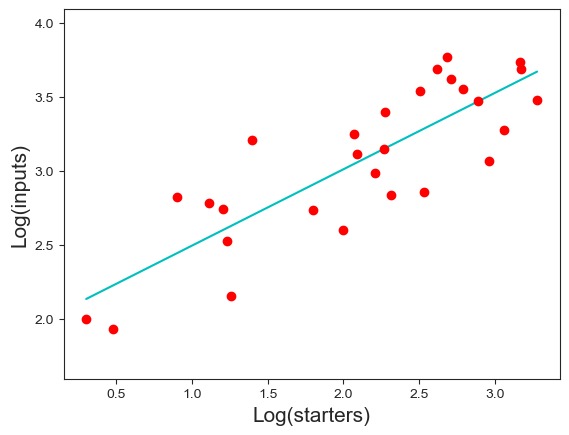

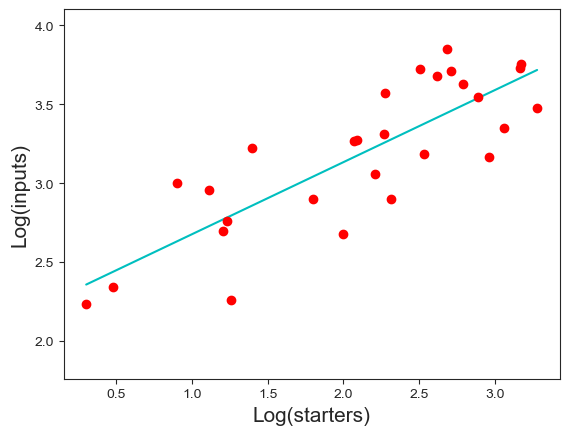

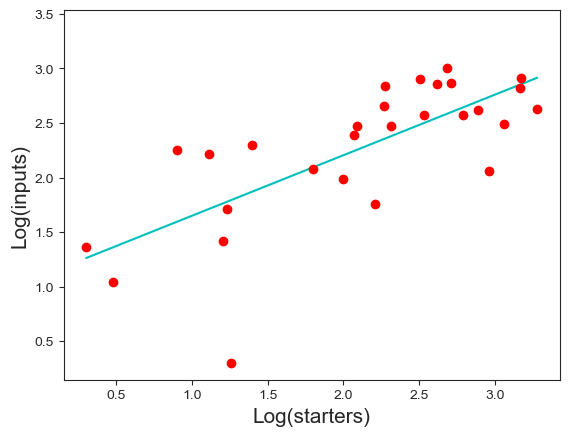

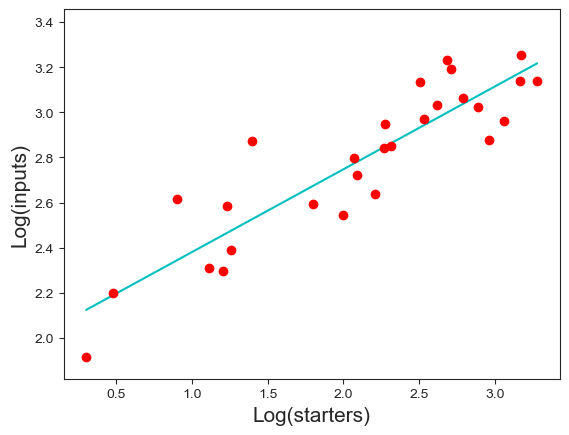

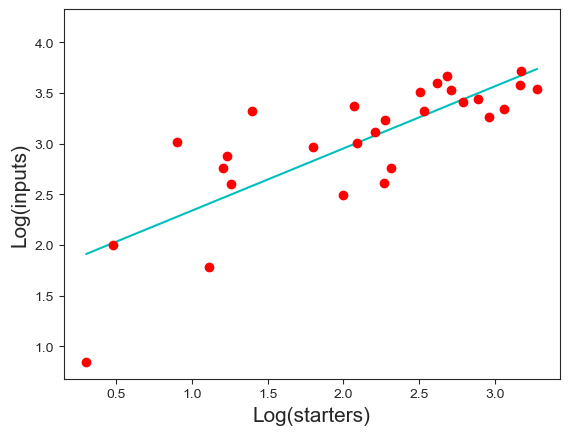

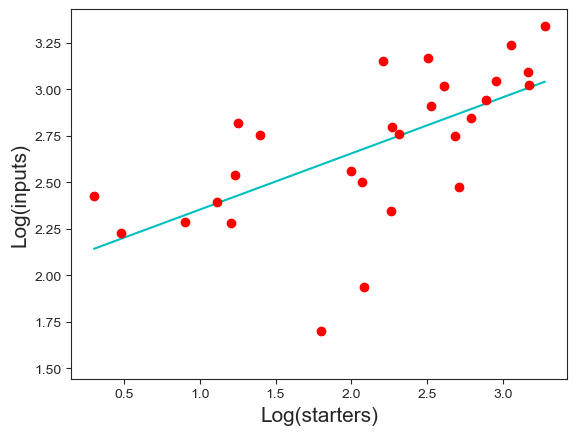

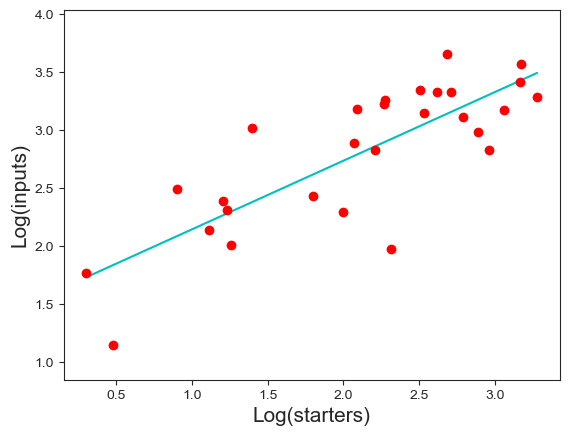

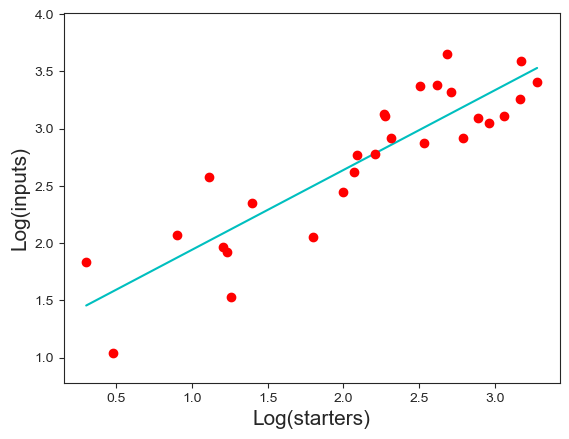

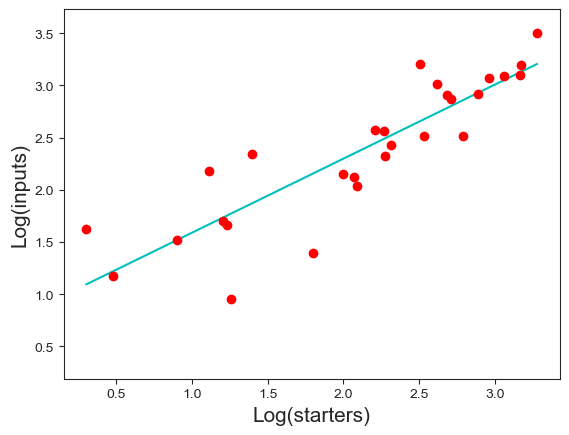

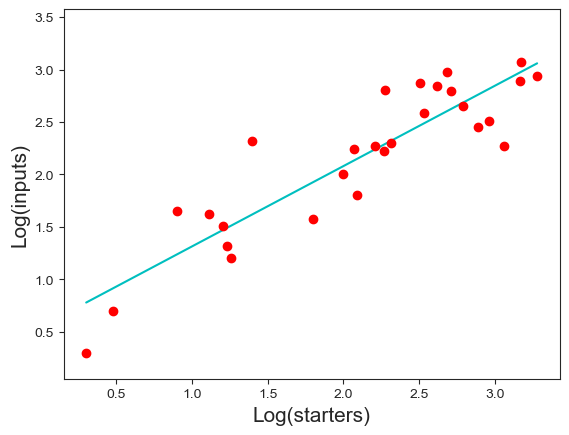

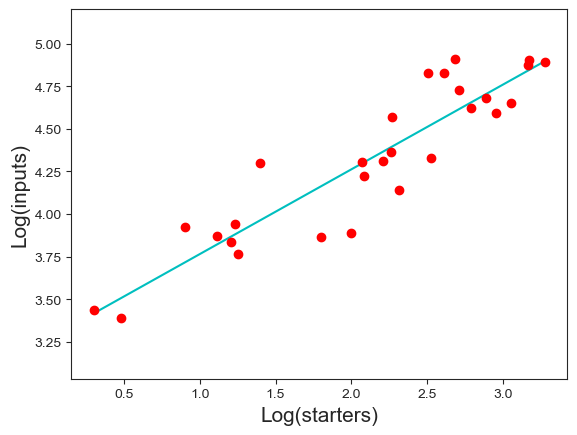

In [14]:
df_boot_int_all, df_boot_slope_all, df_CI95_int_all, df_CI95_slope_all = bstfn.bootstrap_res_and_save2(areas_with_pre, df_log_all, 1, 'all_targets', savepath, savepath_all, numB)

/Users/rancze/Documents/GitHub/Tran_Van_Minh_et_al_2023/functions/bootstrap_functions.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


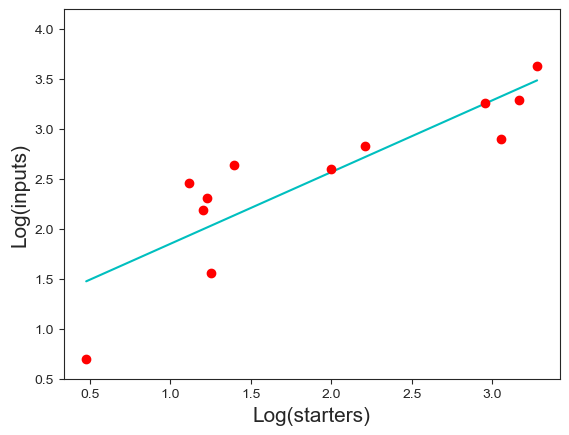

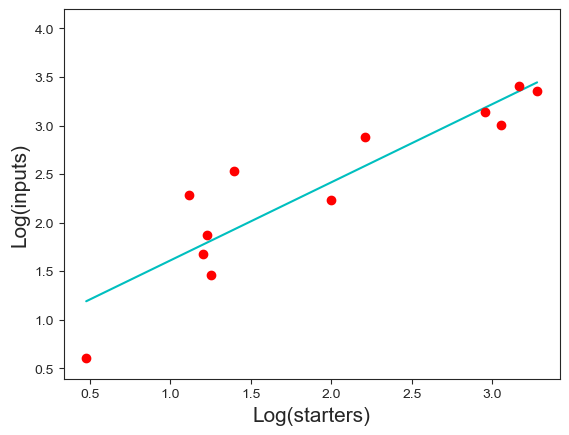

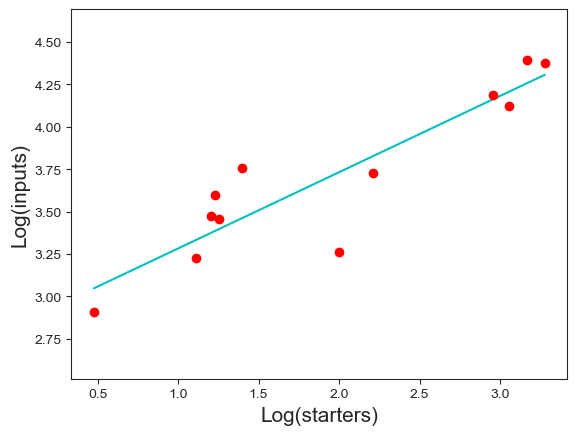

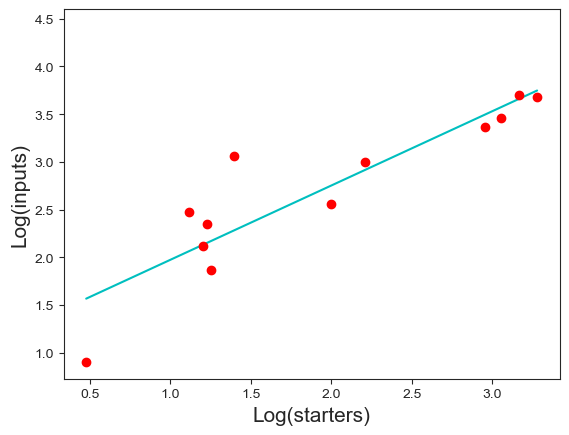

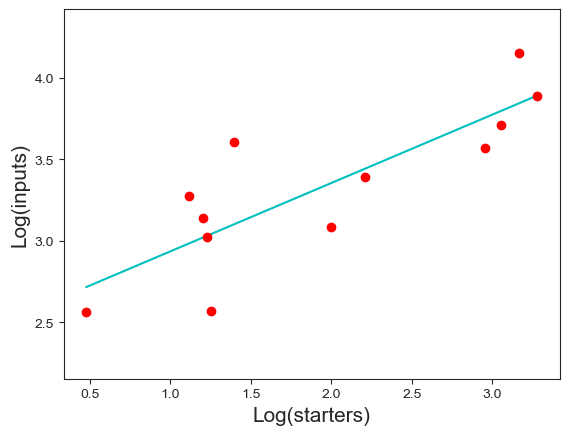

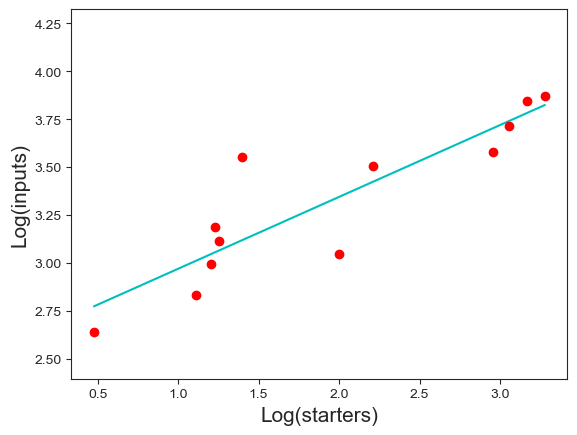

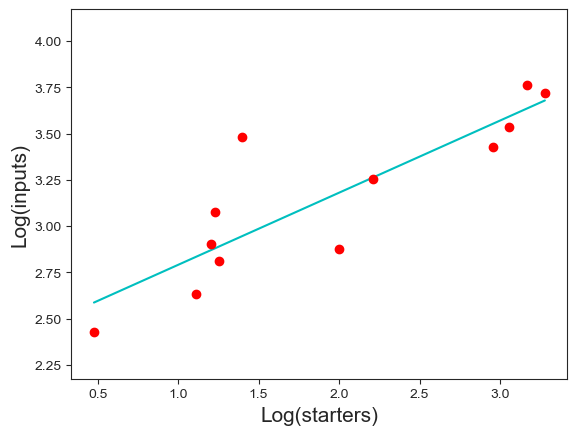

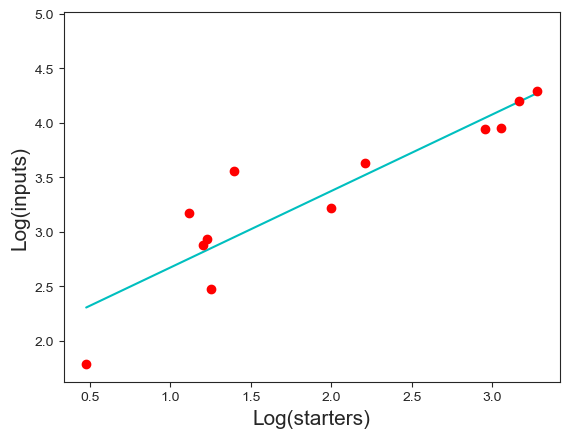

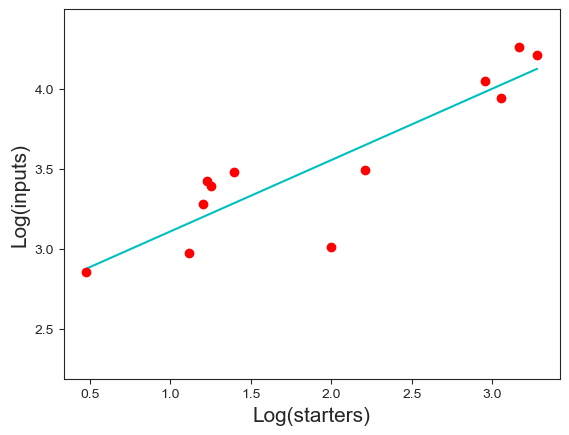

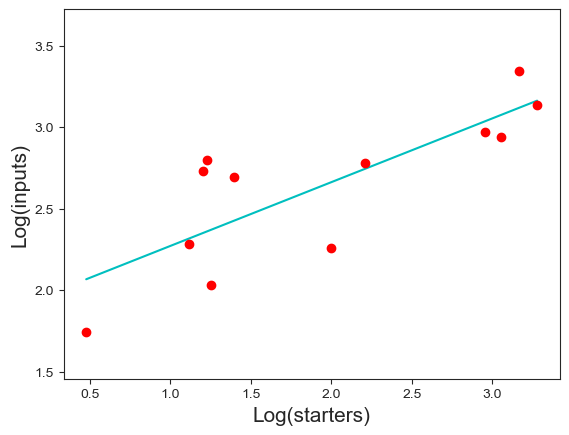

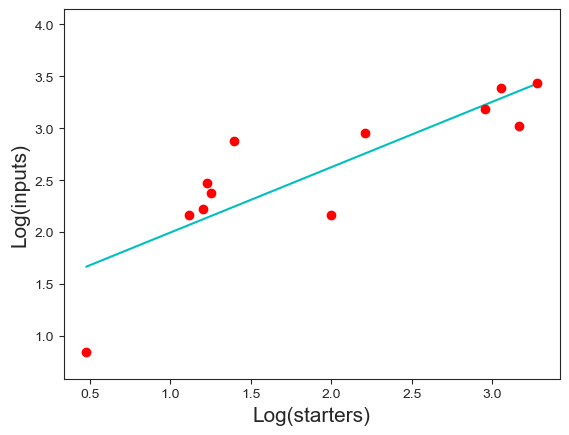

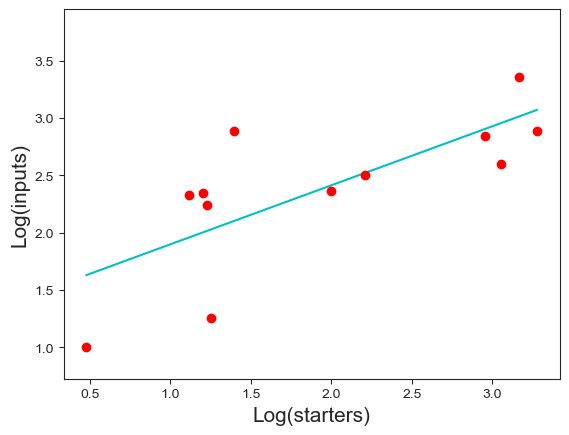

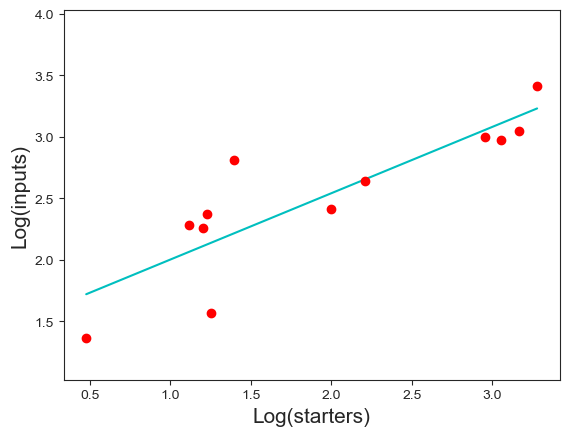

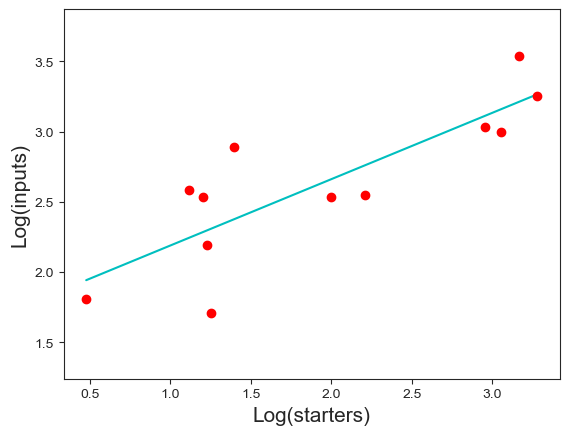

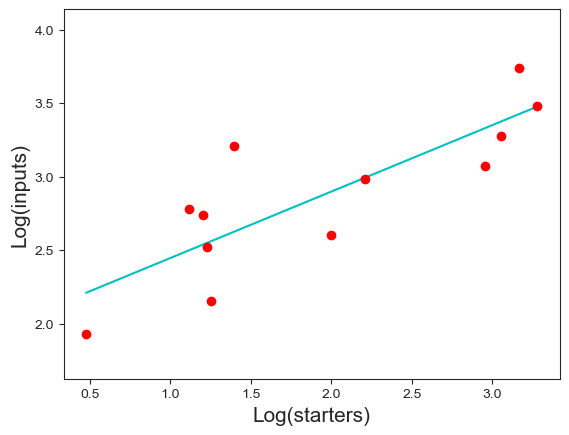

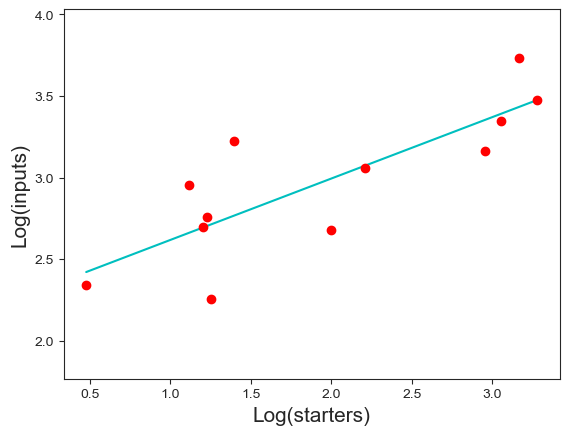

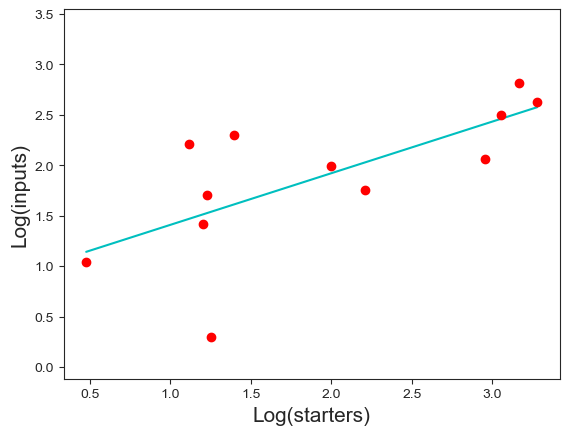

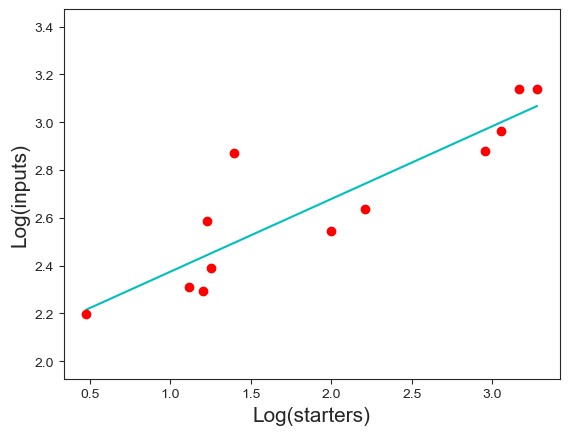

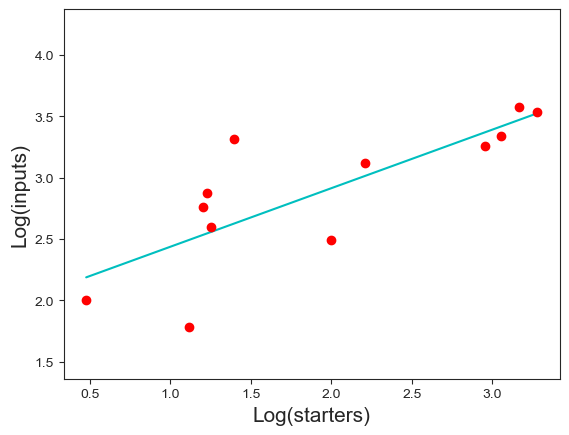

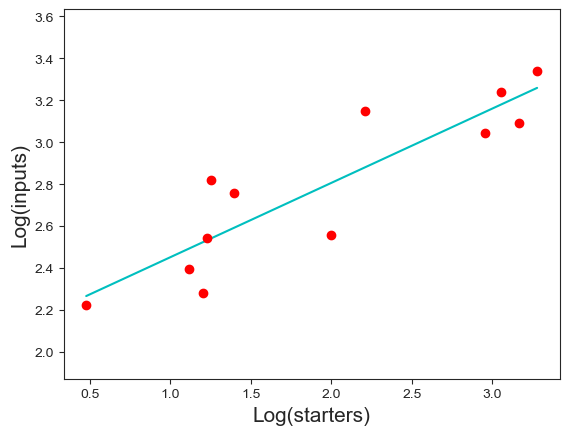

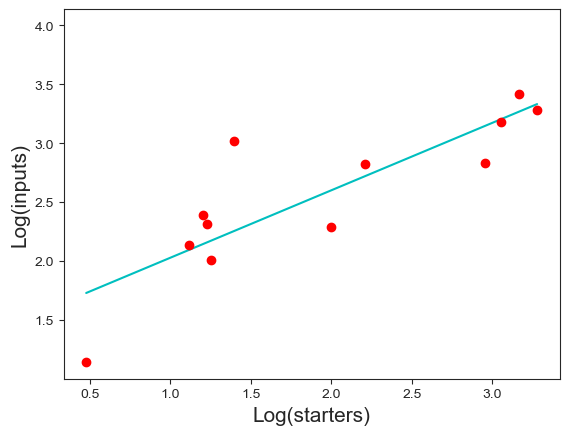

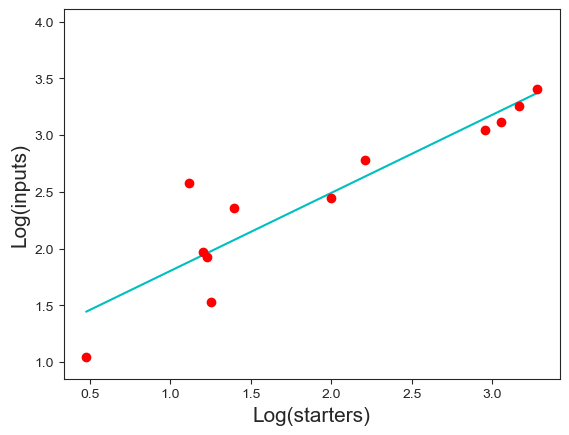

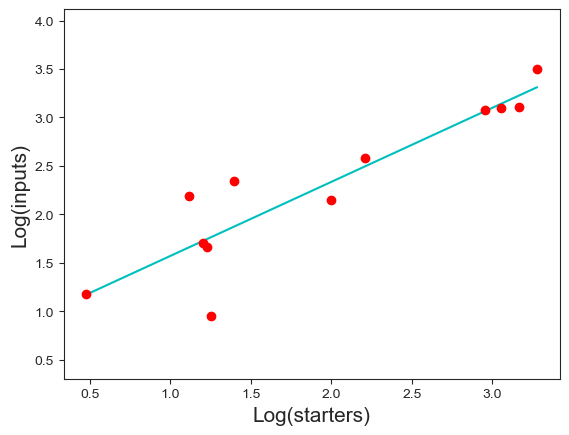

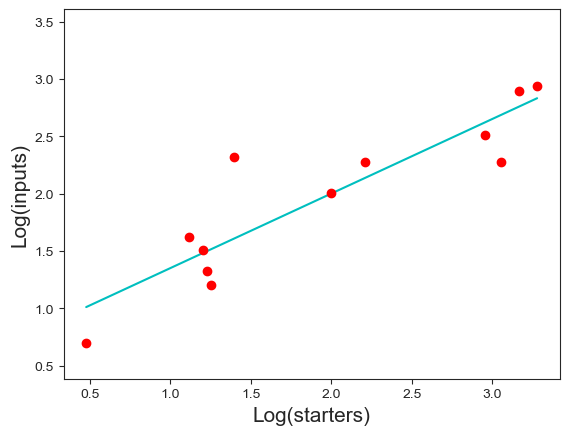

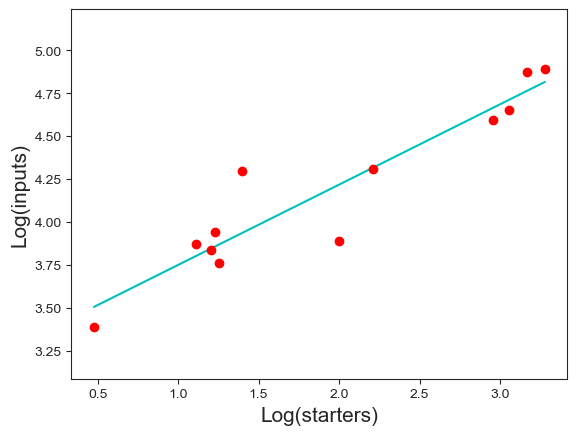

In [15]:
df_boot_int_v1, df_boot_slope_v1, df_CI95_int_v1, df_CI95_slope_v1 = bstfn.bootstrap_res_and_save2(areas_with_pre, df_log_v1, 1, 'targets_V1', savepath, savepath_v1pm, numB)

/Users/rancze/Documents/GitHub/Tran_Van_Minh_et_al_2023/functions/bootstrap_functions.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


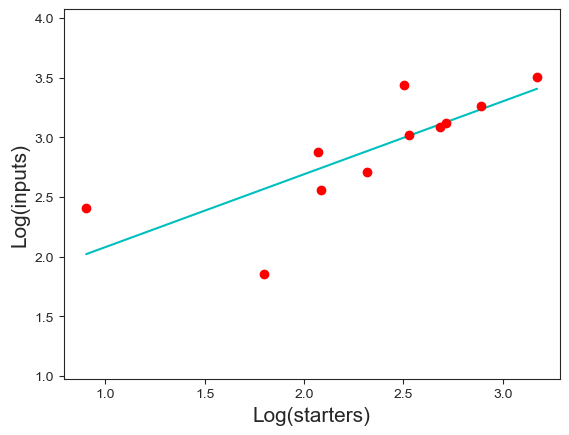

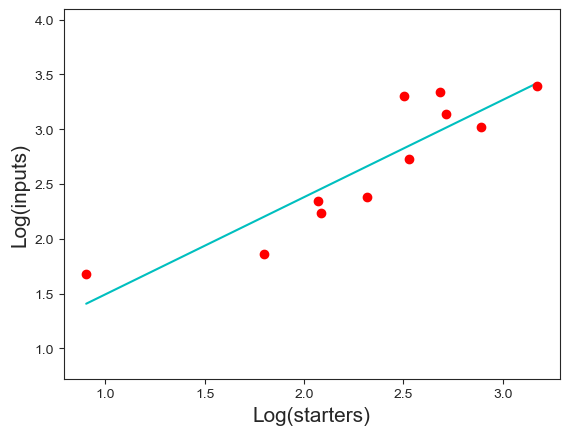

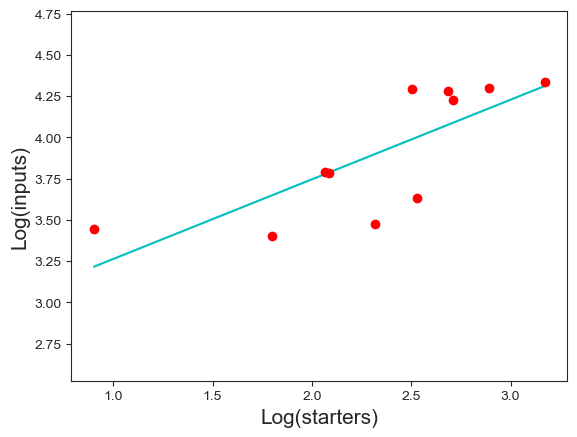

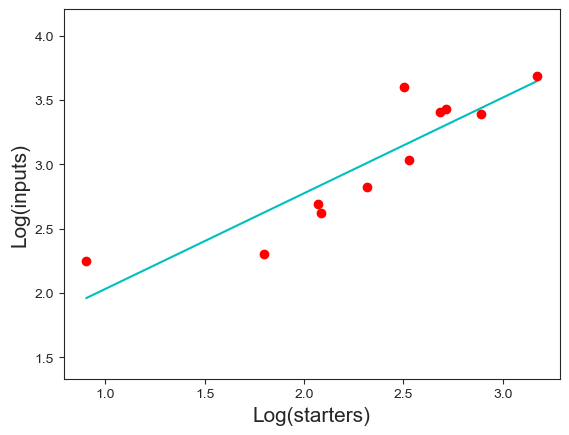

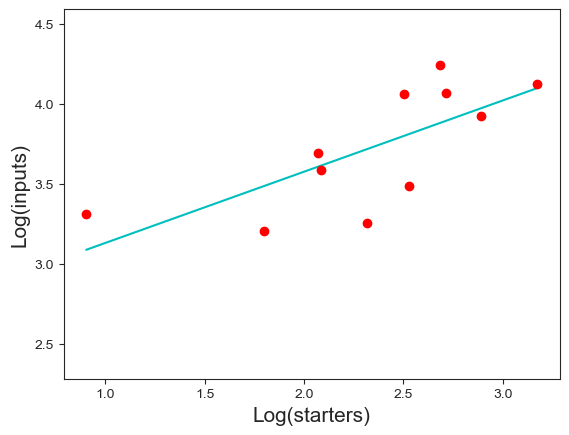

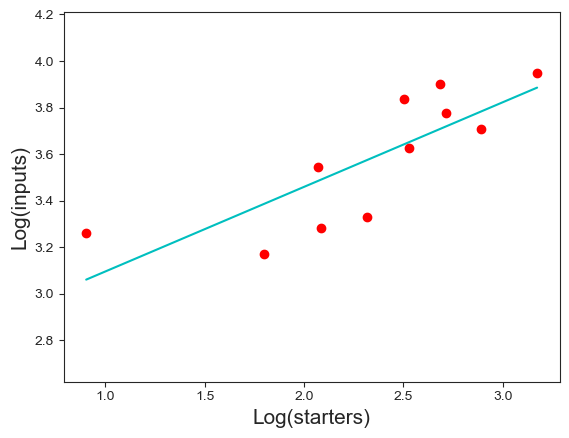

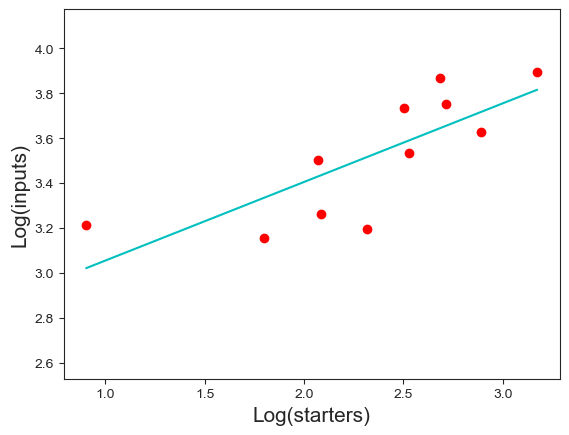

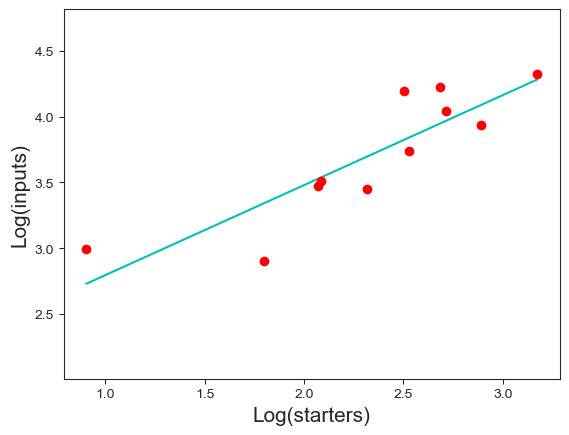

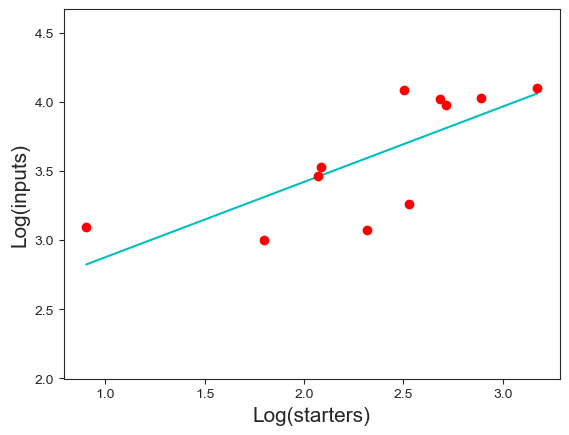

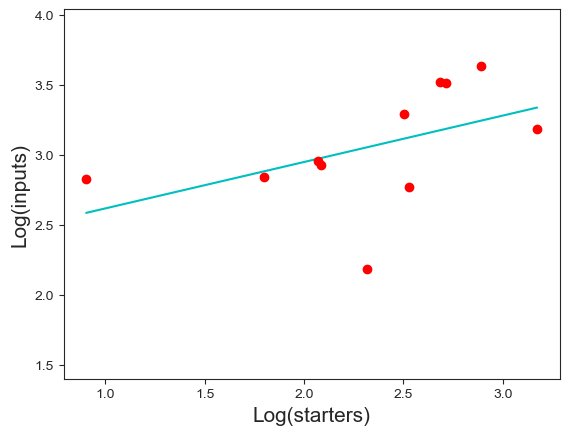

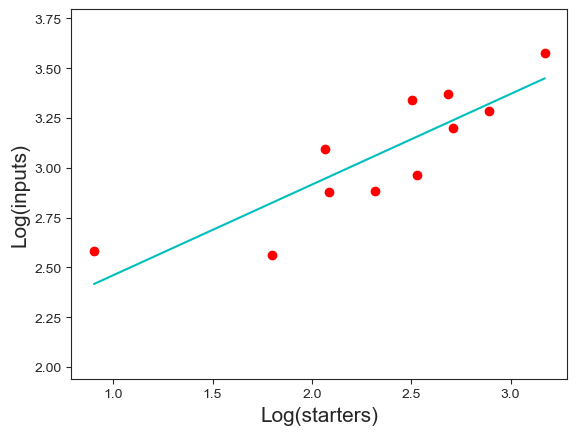

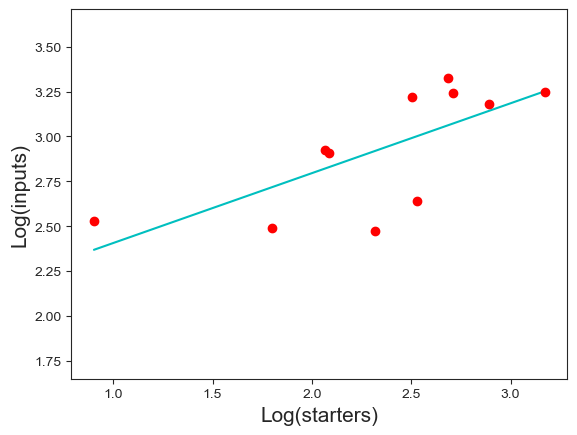

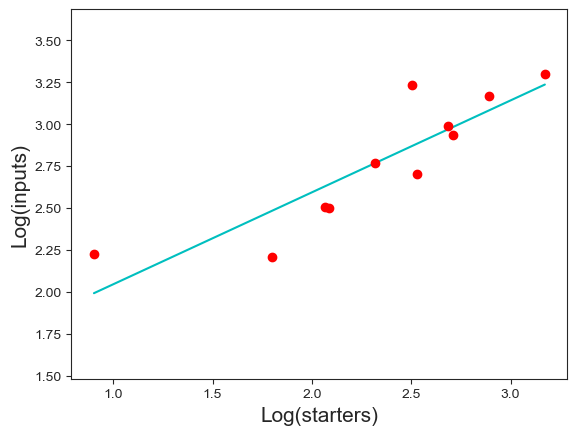

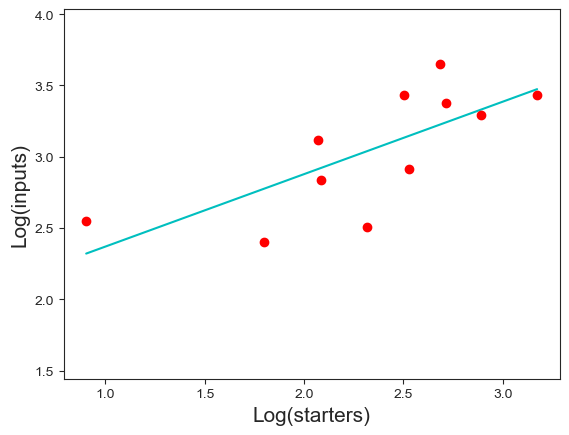

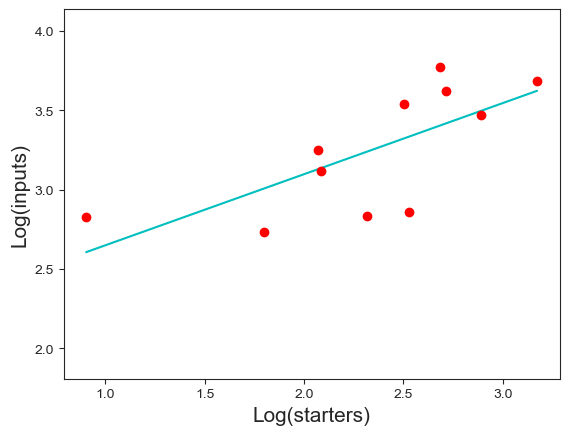

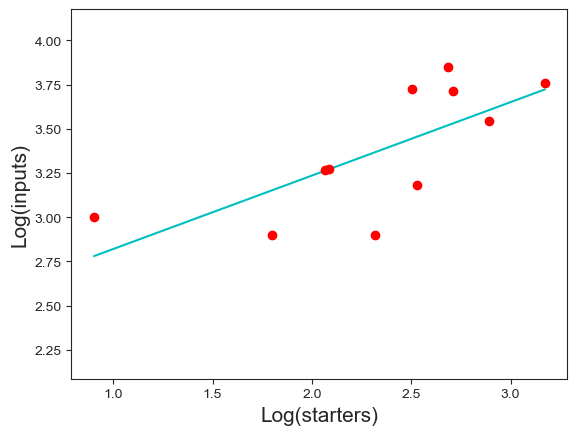

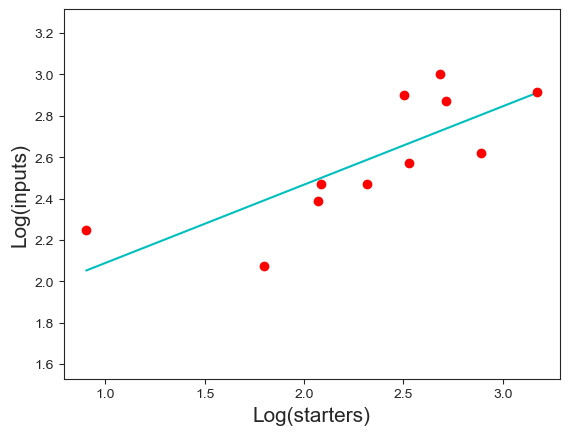

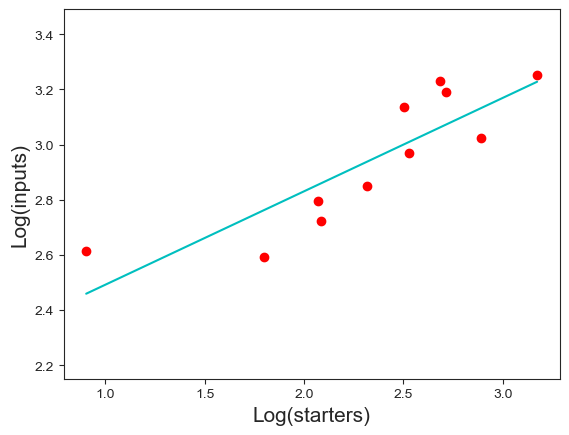

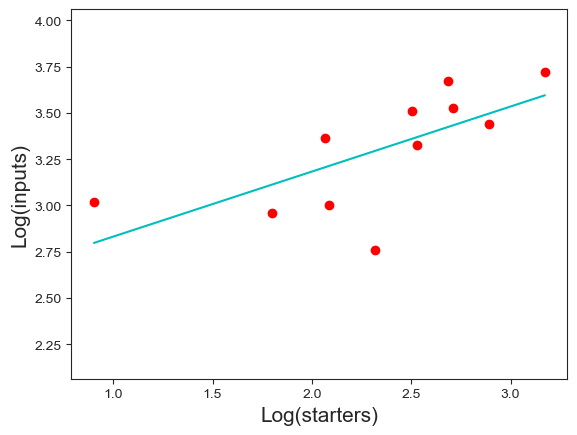

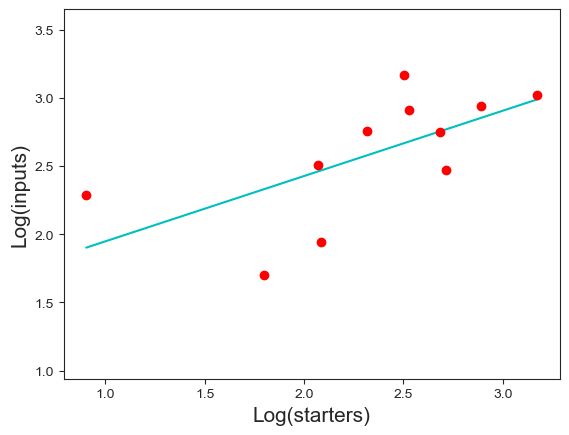

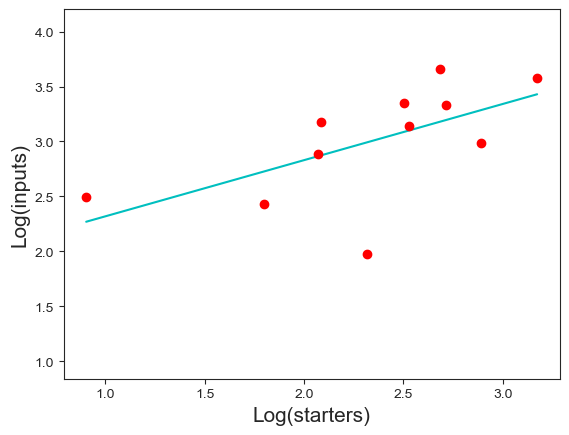

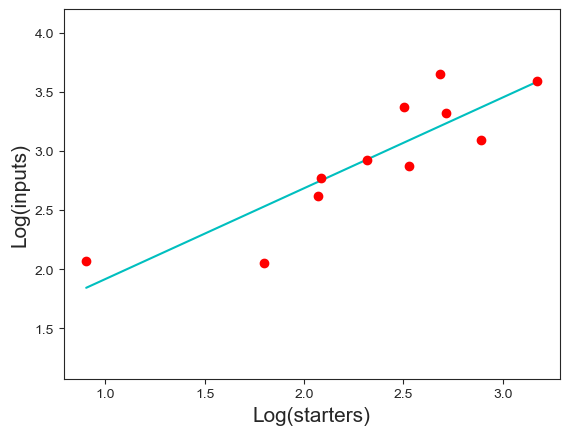

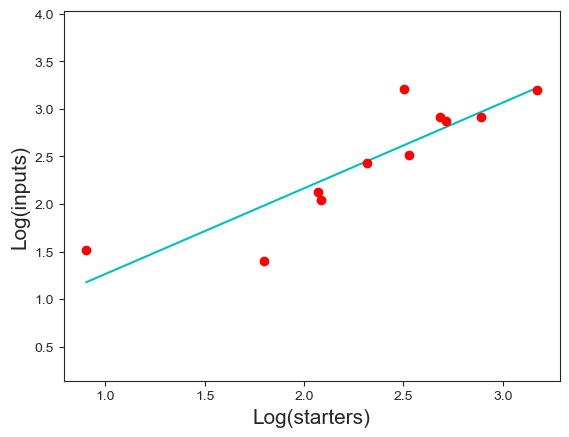

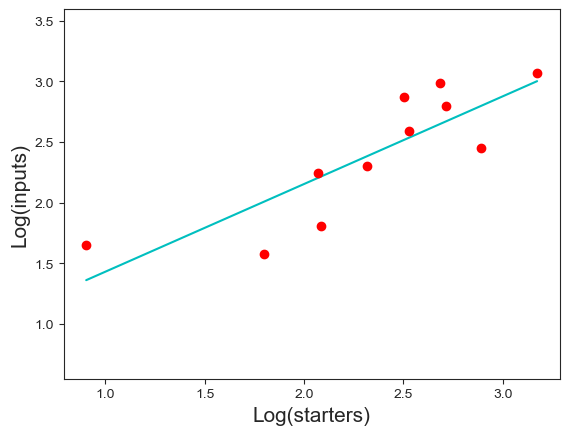

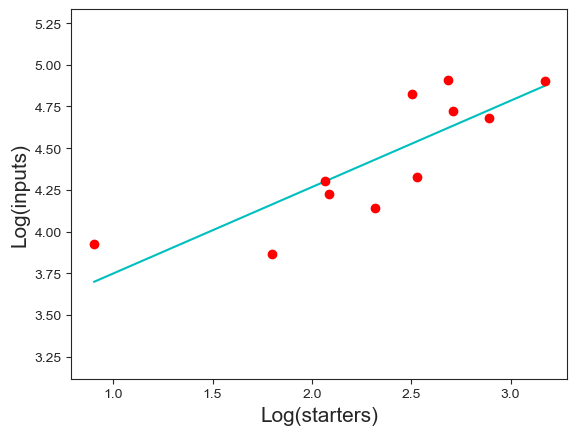

In [16]:
df_boot_int_pm, df_boot_slope_pm, df_CI95_int_pm, df_CI95_slope_pm = bstfn.bootstrap_res_and_save2(areas_with_pre, df_log_pm, 1, 'targets_PM', savepath, savepath_v1pm, numB)

# Save plots with 95% CI

from the bootstrapped data we want either the percentile or the standard error? 90% CI definition is  "Were this procedure to be repeated on numerous samples, the fraction of calculated confidence intervals (which would differ for each sample) that encompass the true population parameter would tend toward 90%." Cox D.R., Hinkley D.V. (1974) Theoretical Statistics, Chapman & Hall, p49, p209 + Wikipedia
this is what we do with the bootstrap. From plots of 95% CI from the least-square fit and 95% percentile from 2000 residuals bootstrap iteration we saw that they are indeed pretty similar

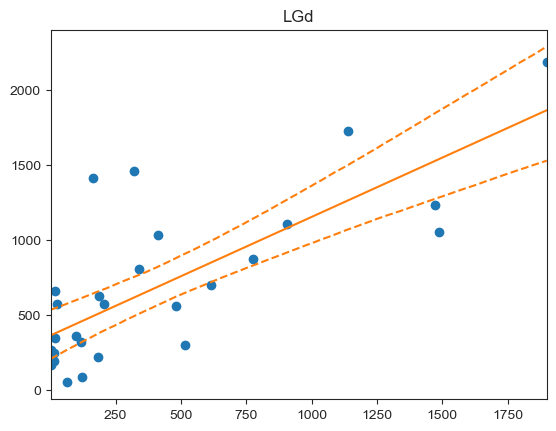

In [17]:
bstfn.plot_scatter_95bs(['LGd'], df_all, 0, df_boot_int_all_lin, df_boot_slope_all_lin, 'all_targets_lin', savepath_all)

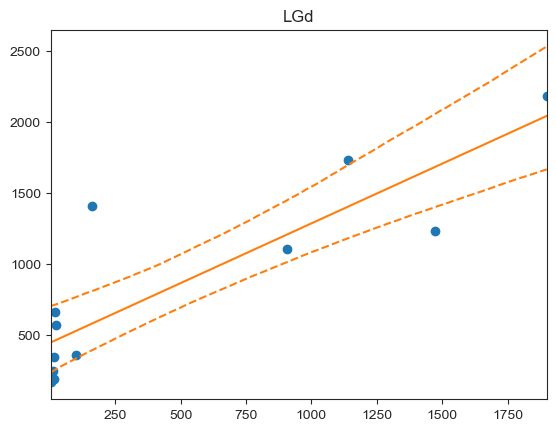

In [18]:
bstfn.plot_scatter_95bs(['LGd'], df_v1, 0, df_boot_int_v1_lin, df_boot_slope_v1_lin, 'target_v1_lin', savepath_v1pm)

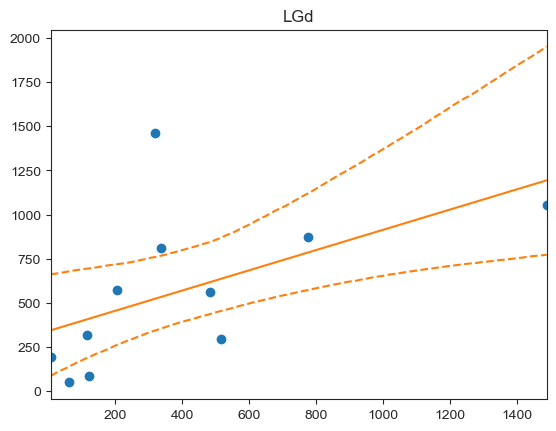

In [19]:
bstfn.plot_scatter_95bs(['LGd'], df_pm, 0, df_boot_int_pm_lin, df_boot_slope_pm_lin, 'target_pm_lin', savepath_v1pm)

/Users/rancze/Documents/GitHub/Tran_Van_Minh_et_al_2023/functions/bootstrap_functions.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


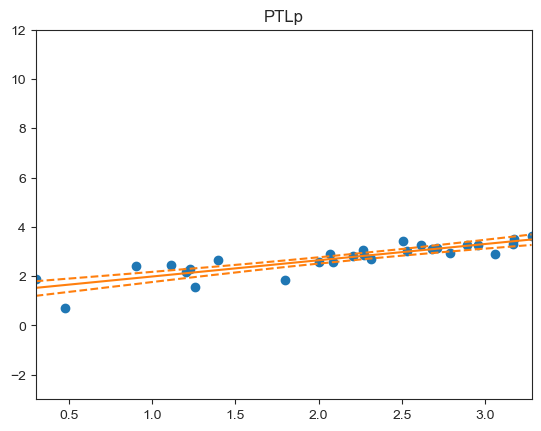

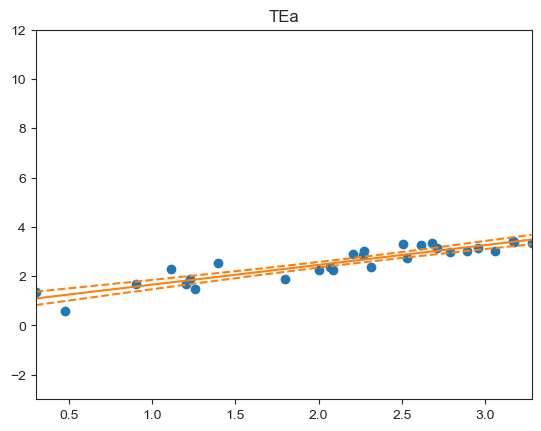

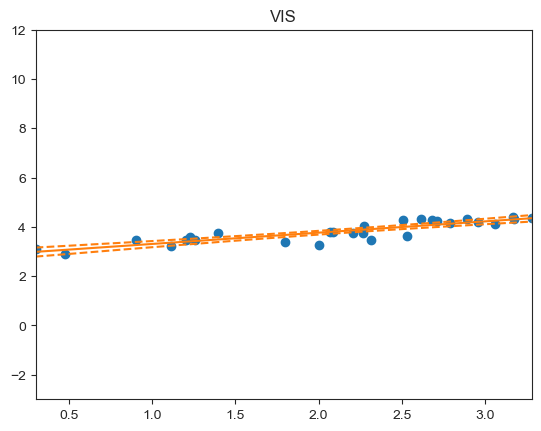

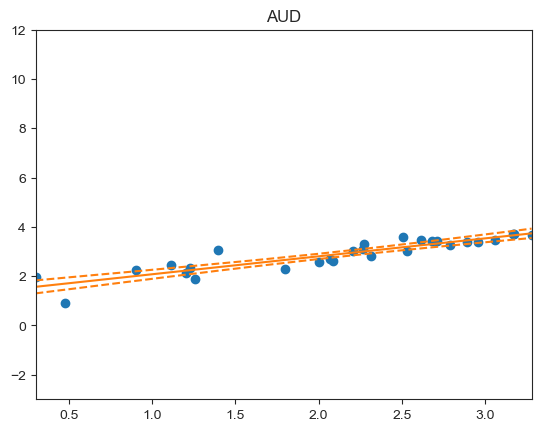

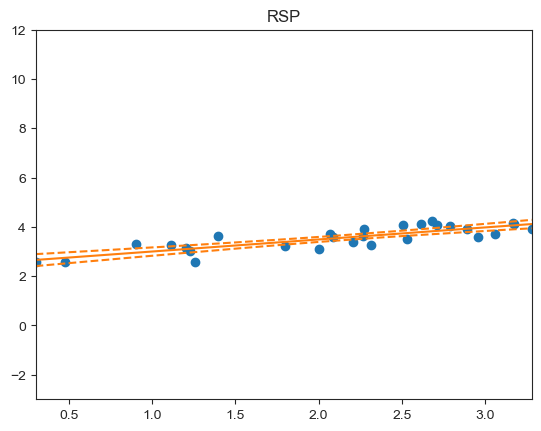

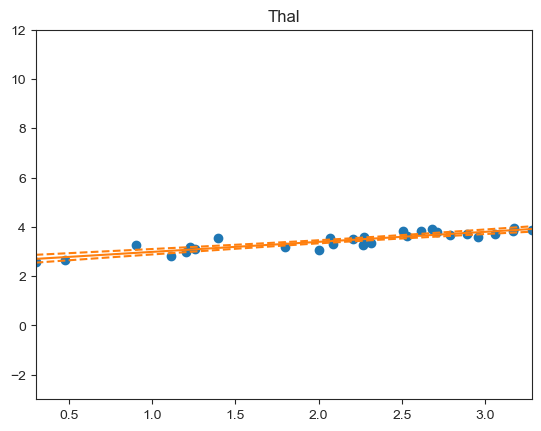

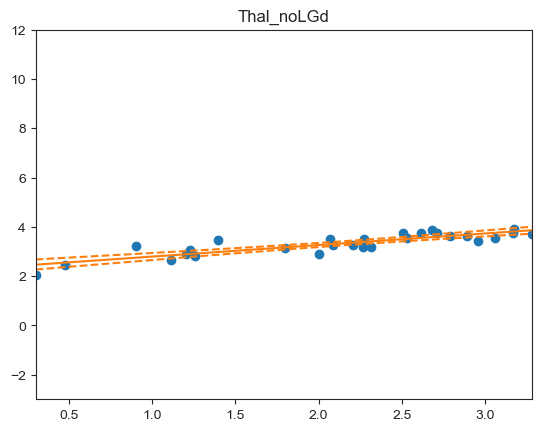

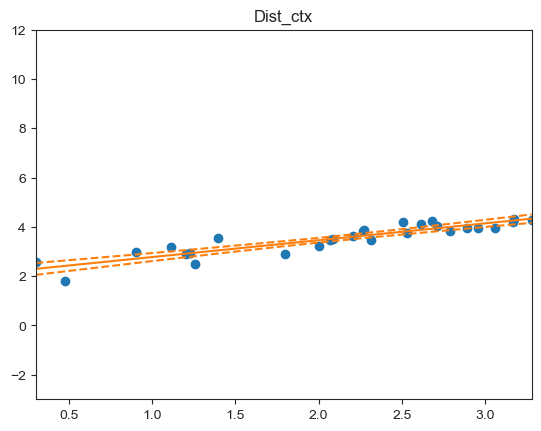

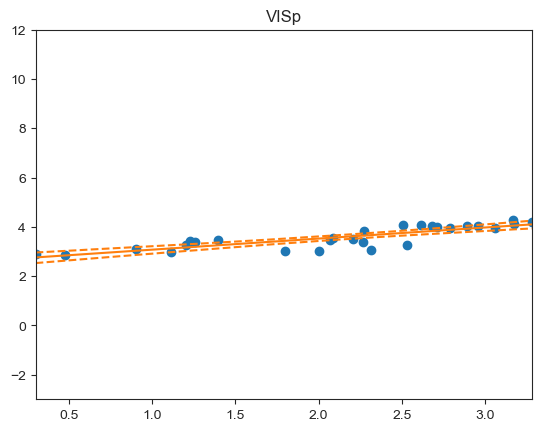

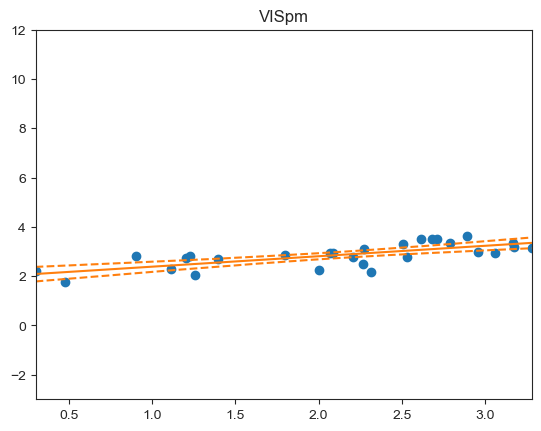

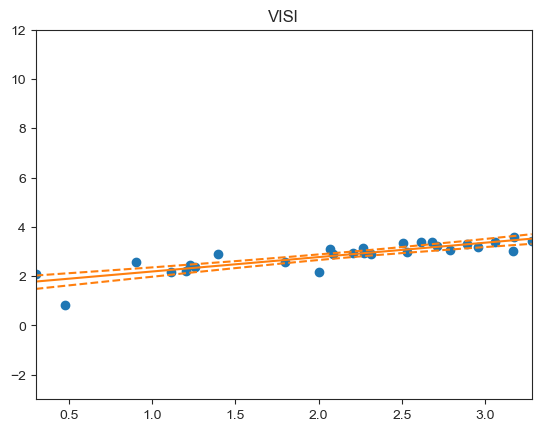

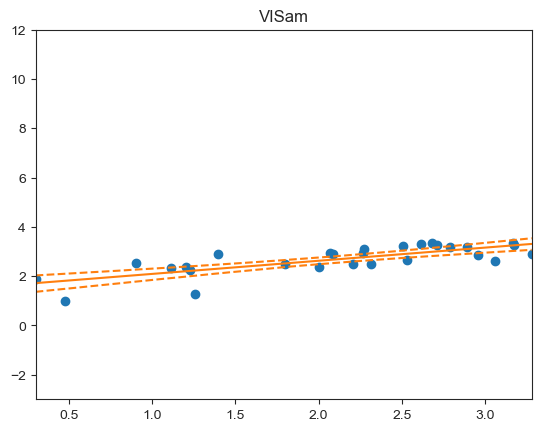

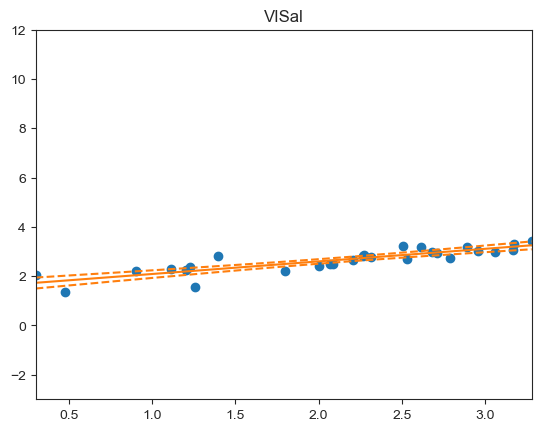

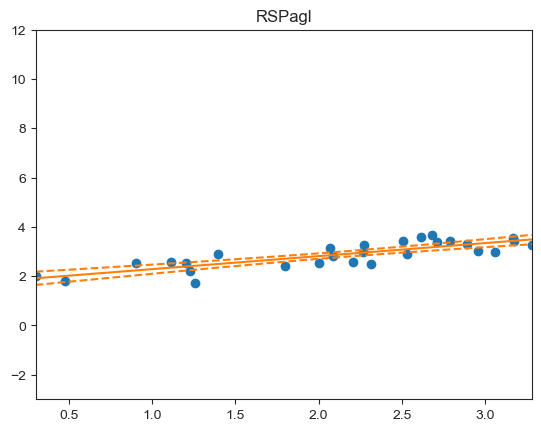

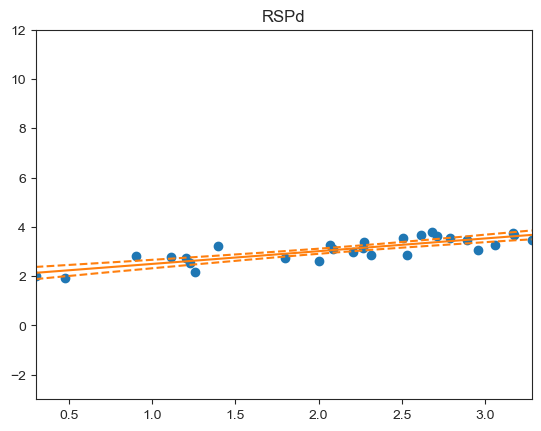

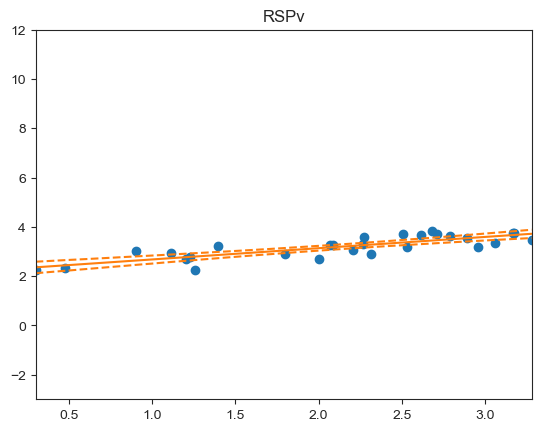

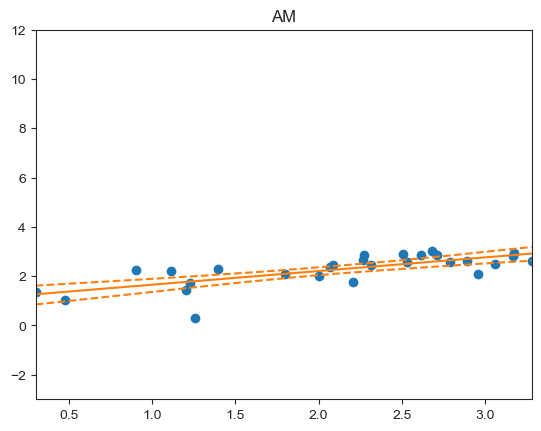

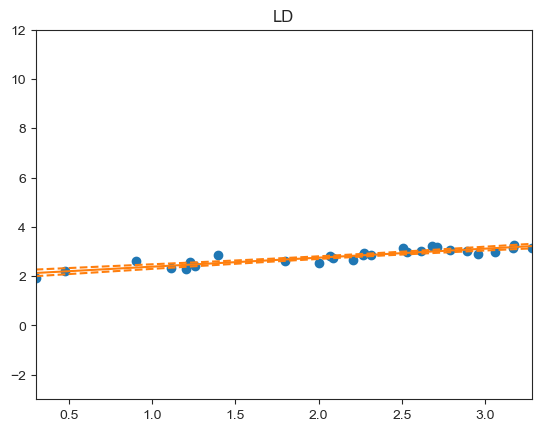

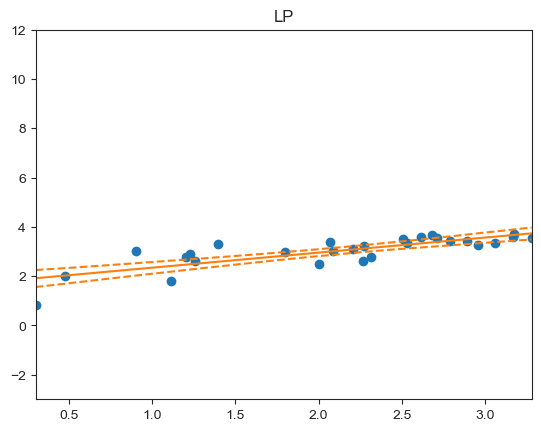

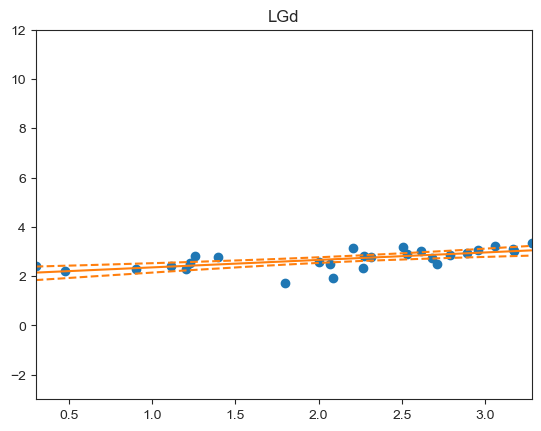

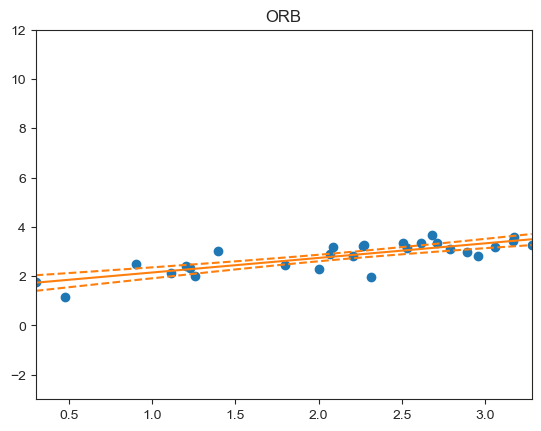

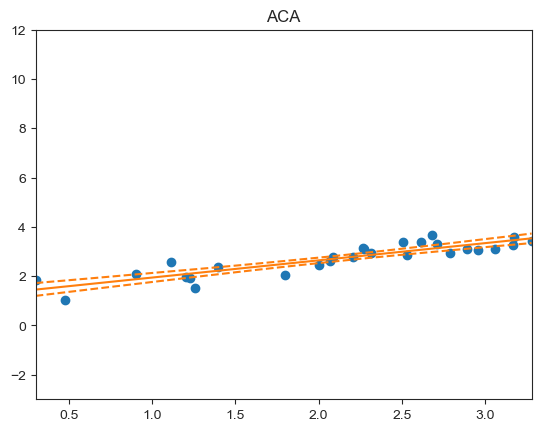

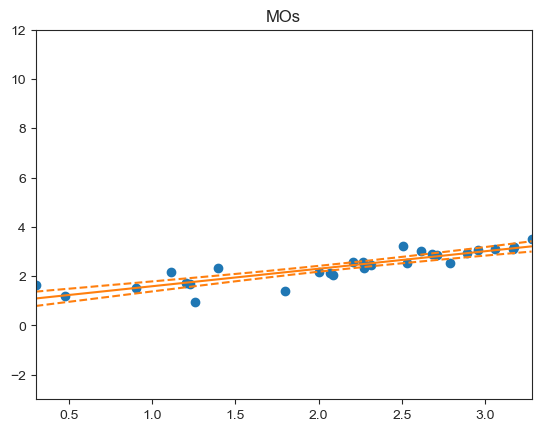

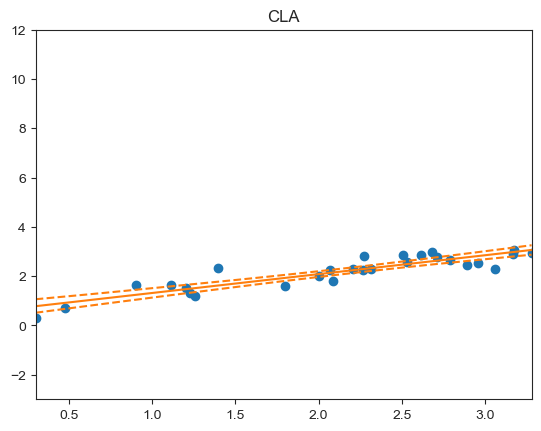

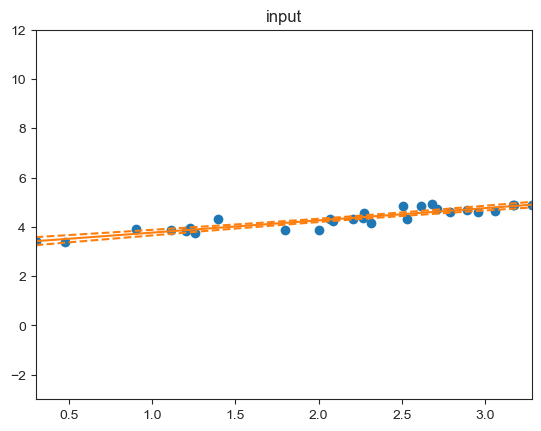

In [20]:
bstfn.plot_scatter_95bs(areas_with_pre, df_log_all, 1, df_boot_int_all, df_boot_slope_all, 'all_targets', savepath_all)

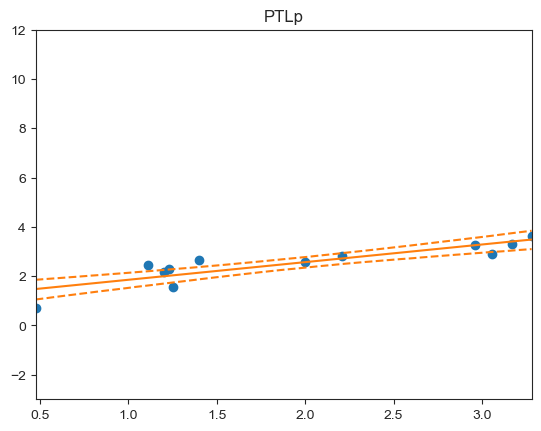

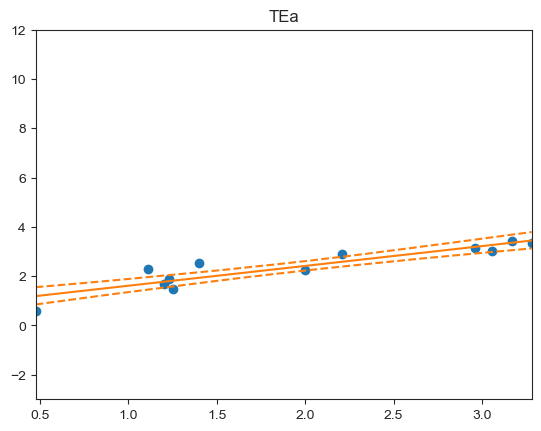

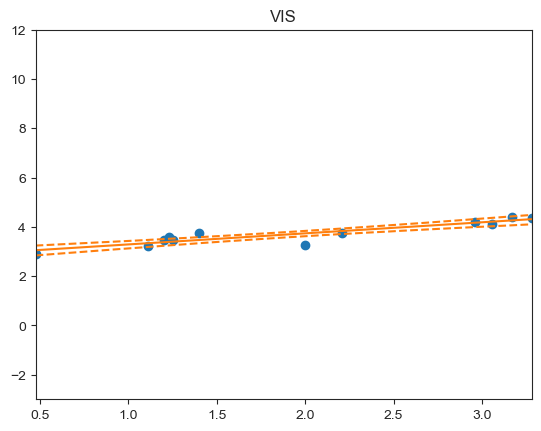

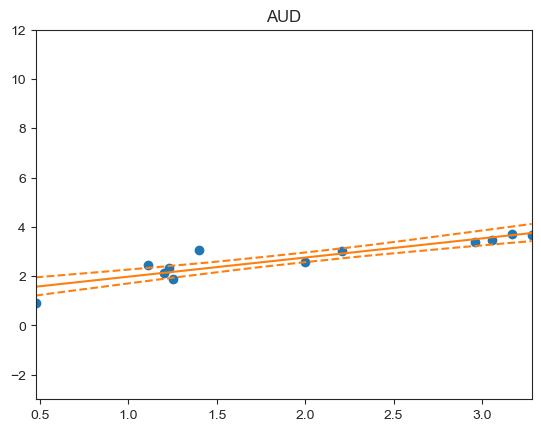

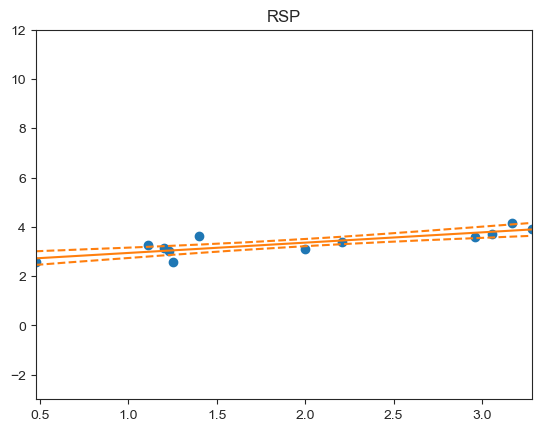

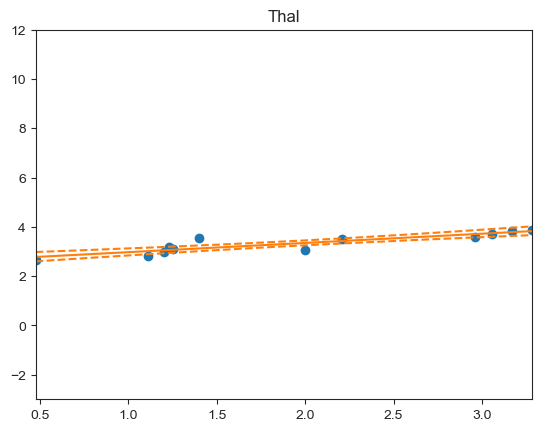

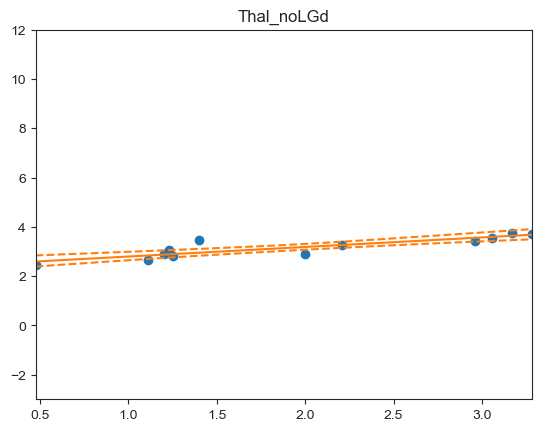

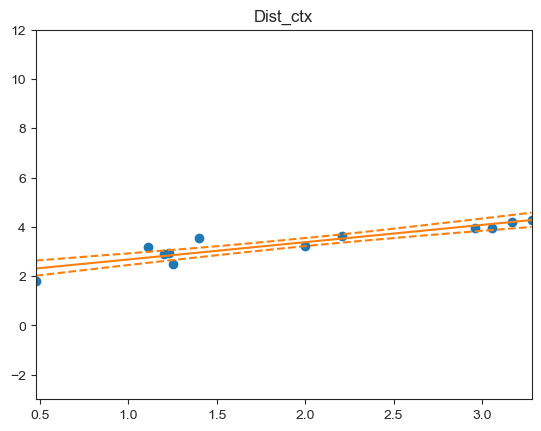

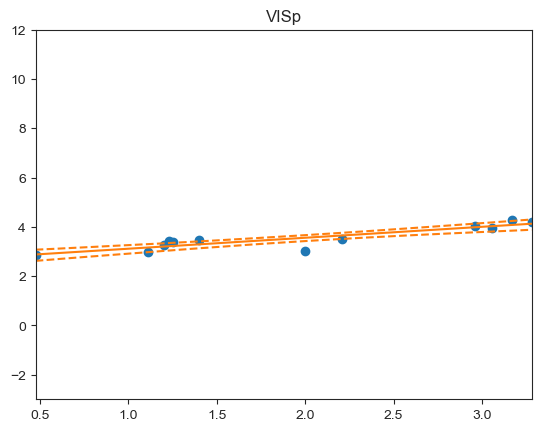

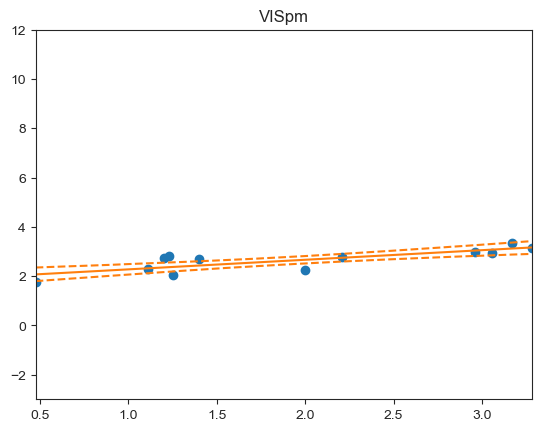

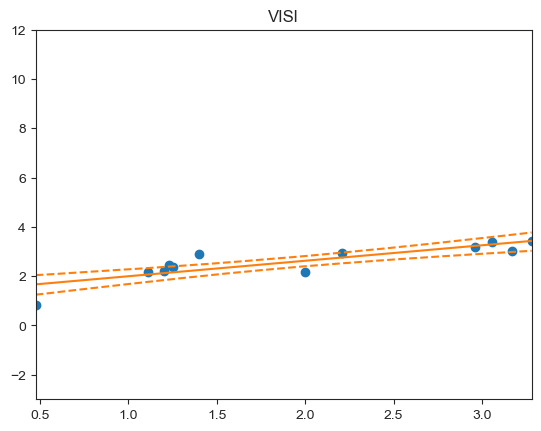

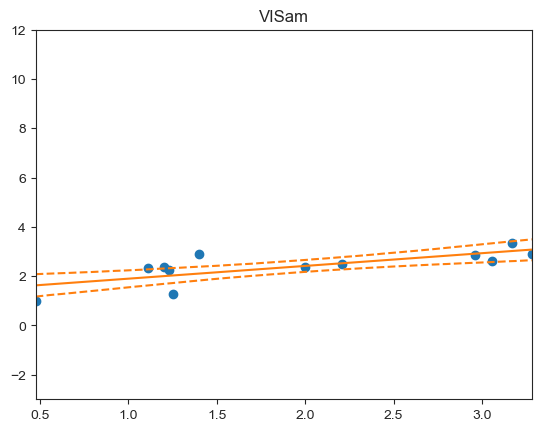

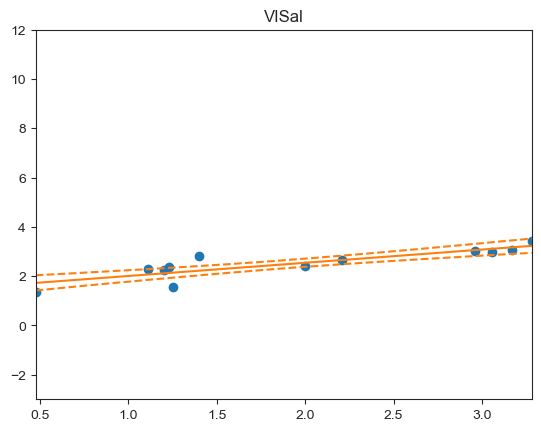

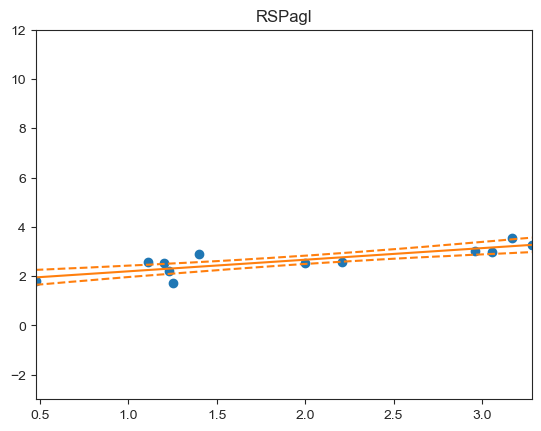

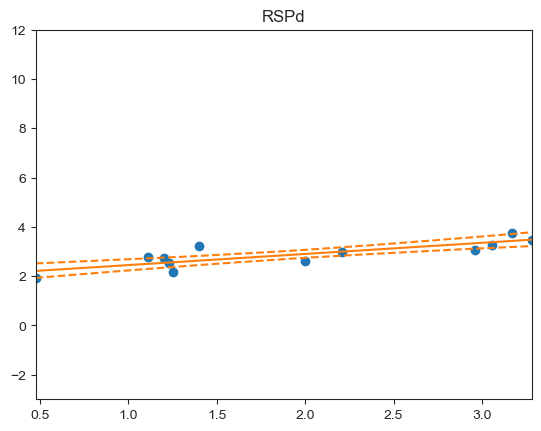

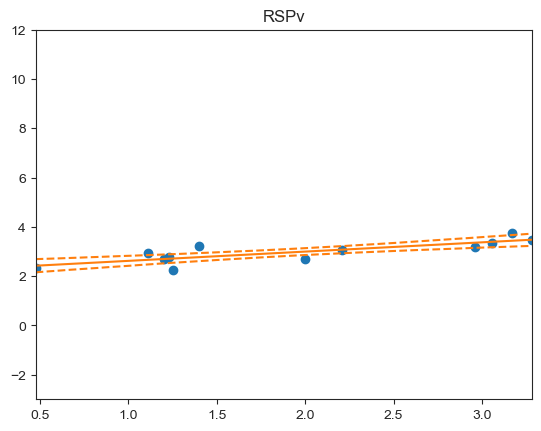

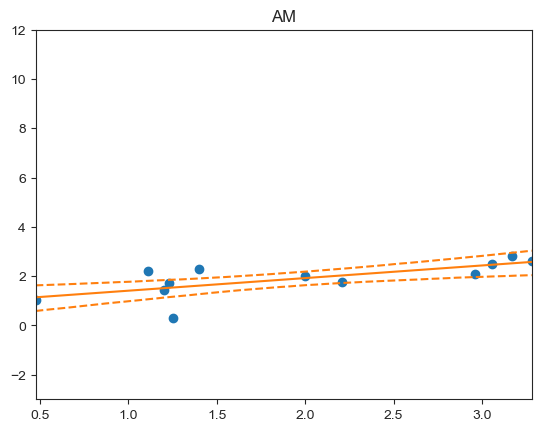

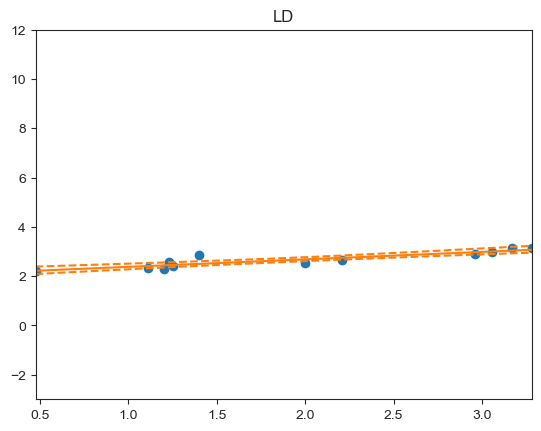

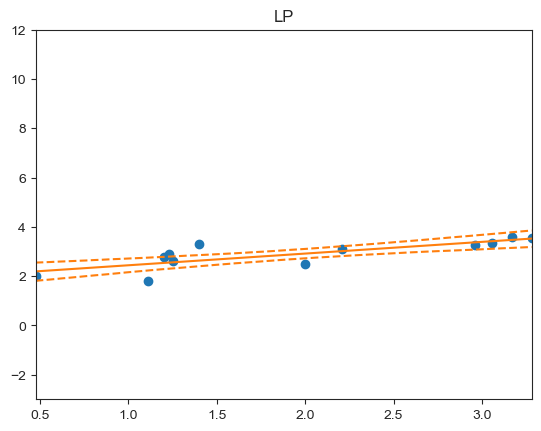

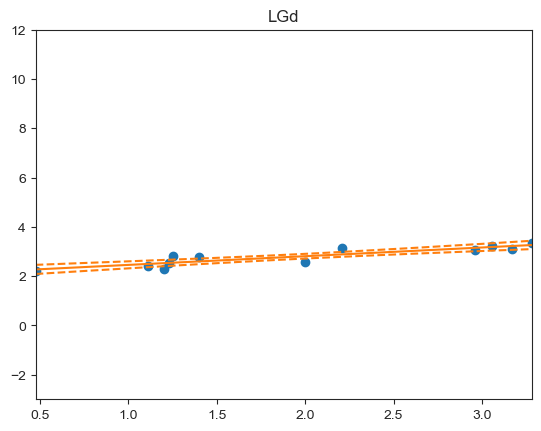

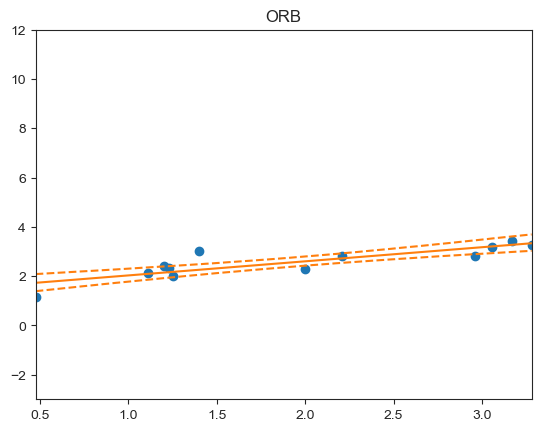

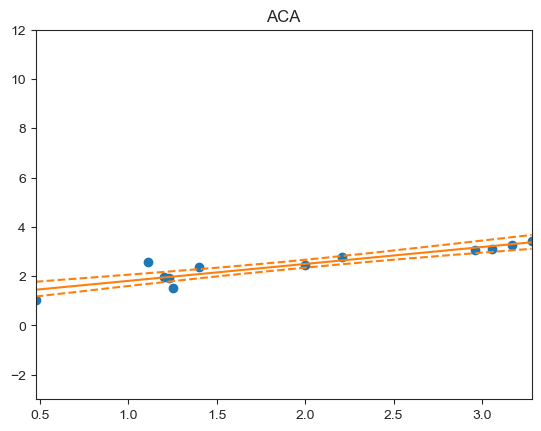

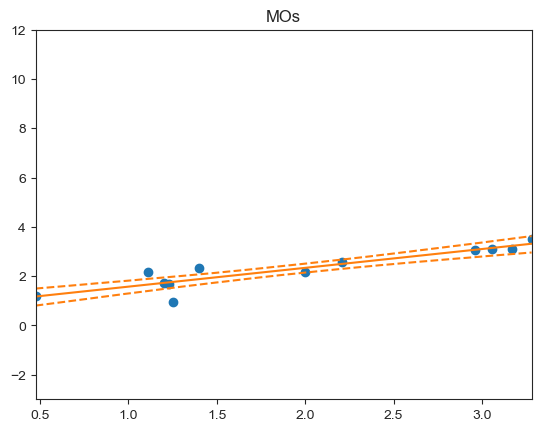

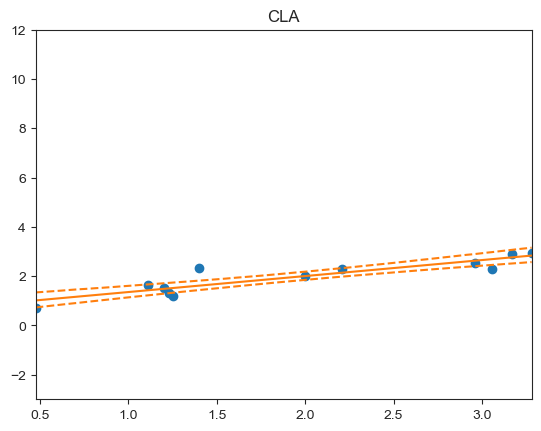

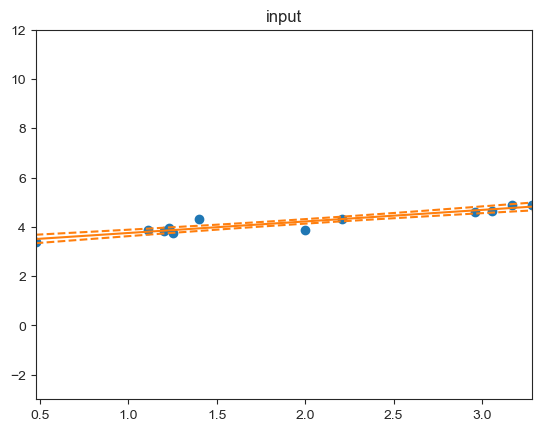

In [21]:
bstfn.plot_scatter_95bs(areas_with_pre, df_log_v1, 1, df_boot_int_v1, df_boot_slope_v1, 'target_v1', savepath_v1pm)

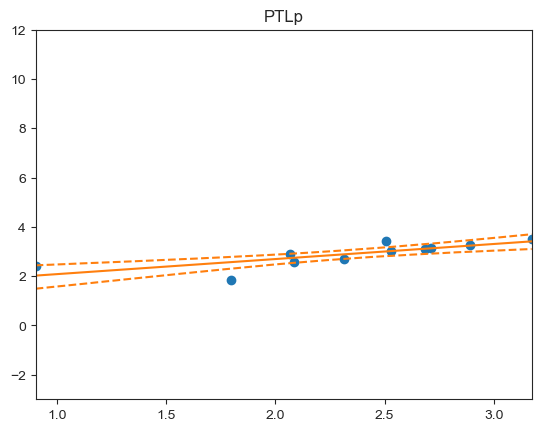

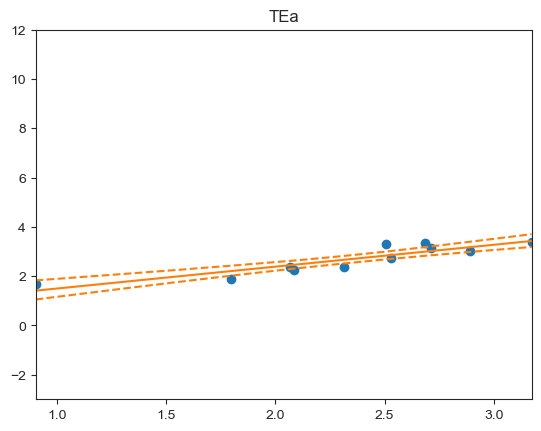

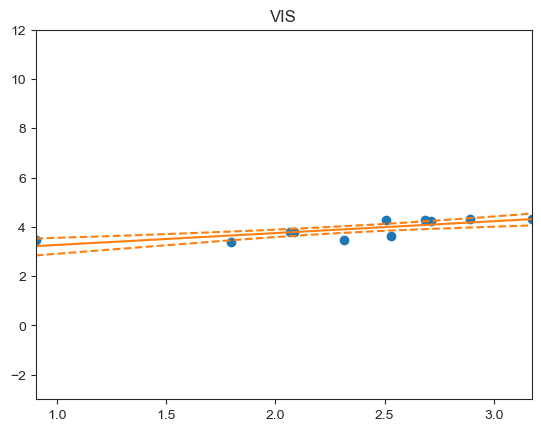

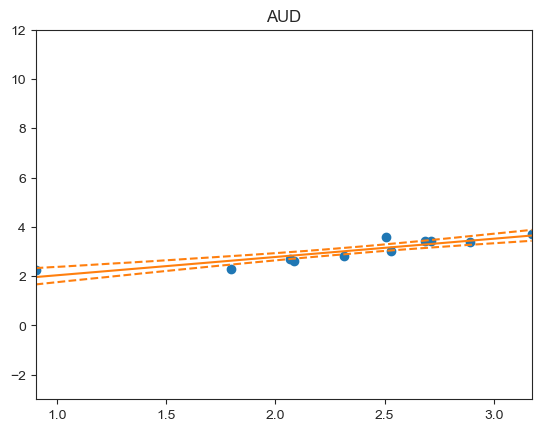

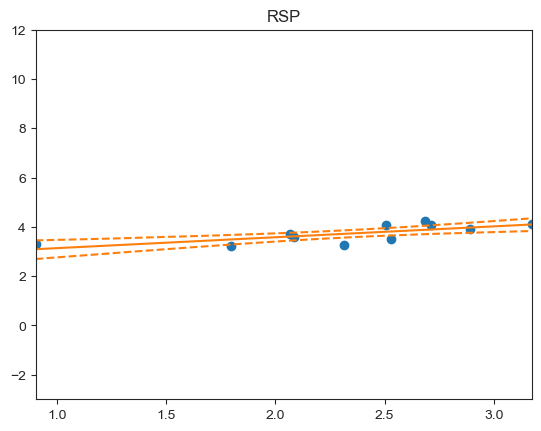

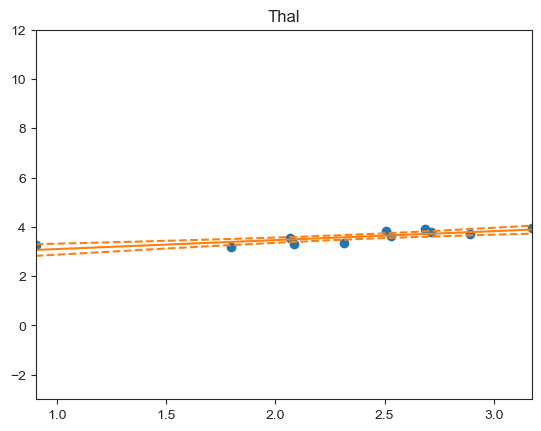

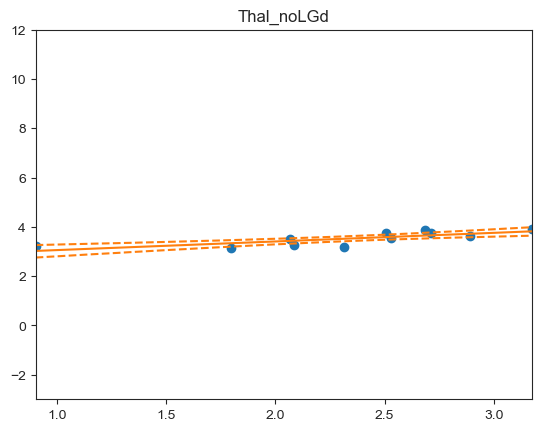

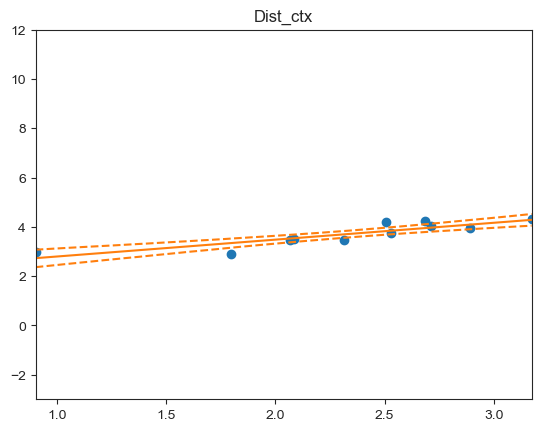

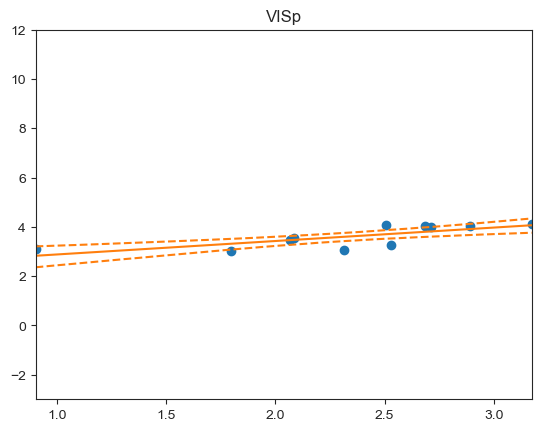

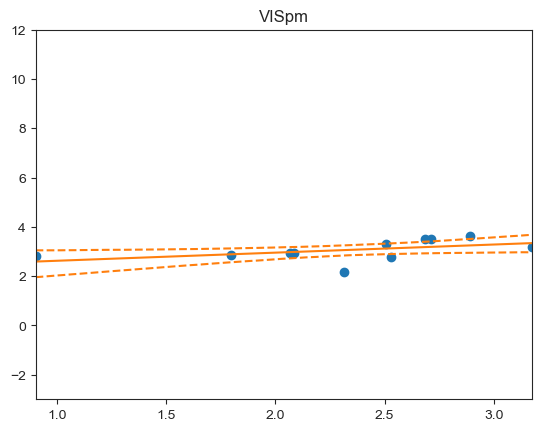

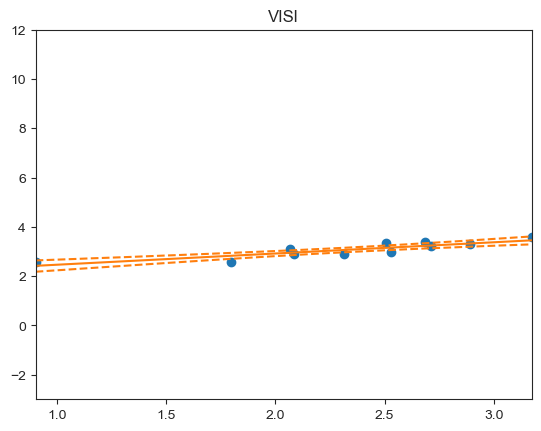

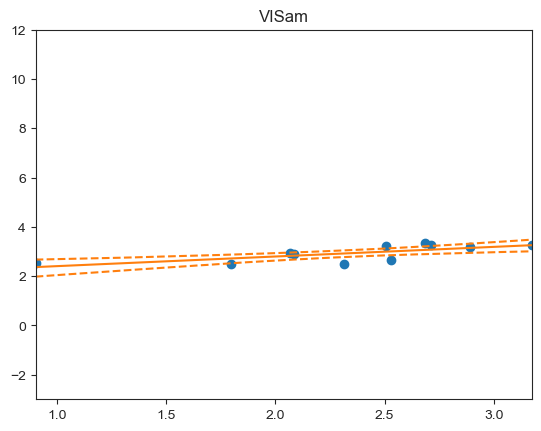

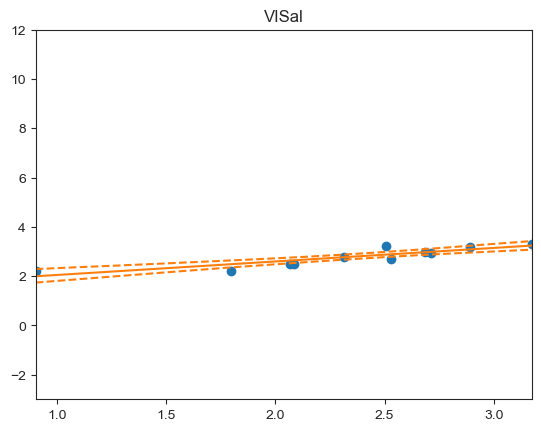

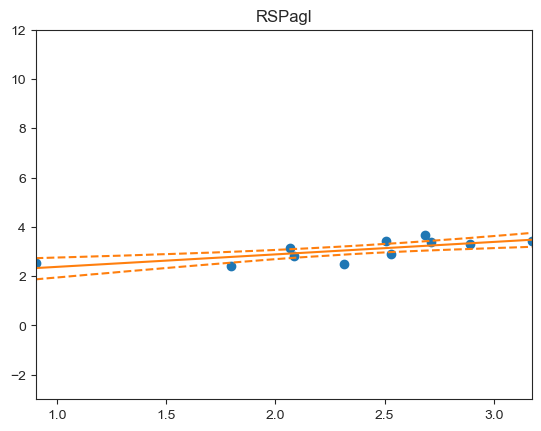

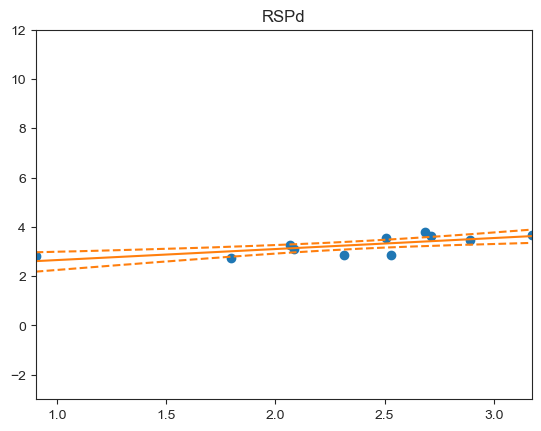

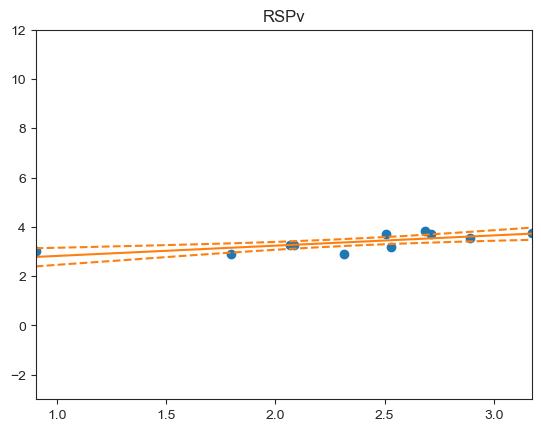

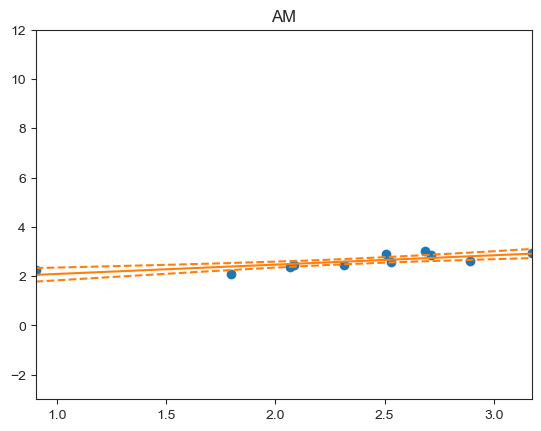

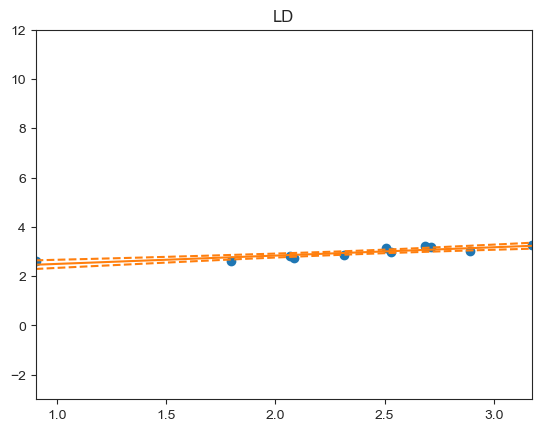

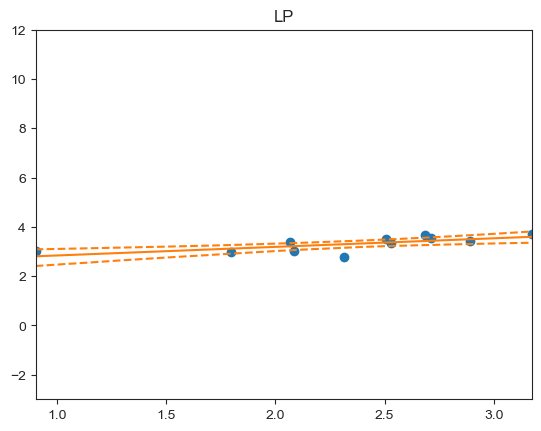

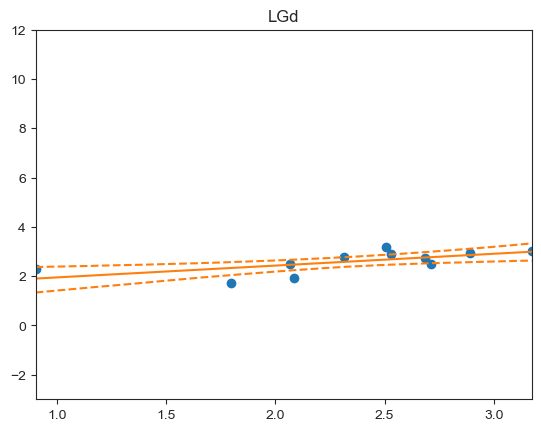

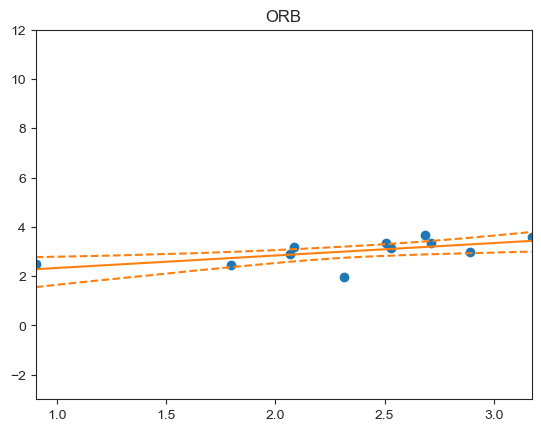

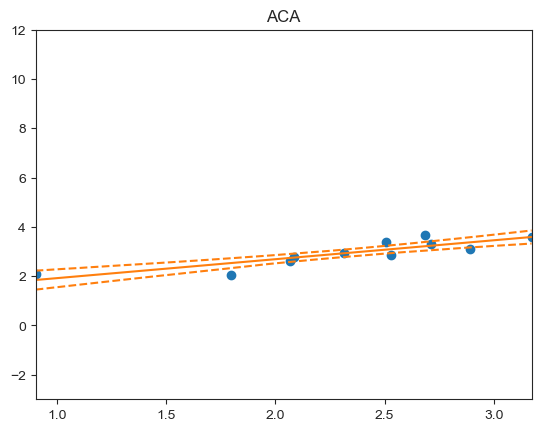

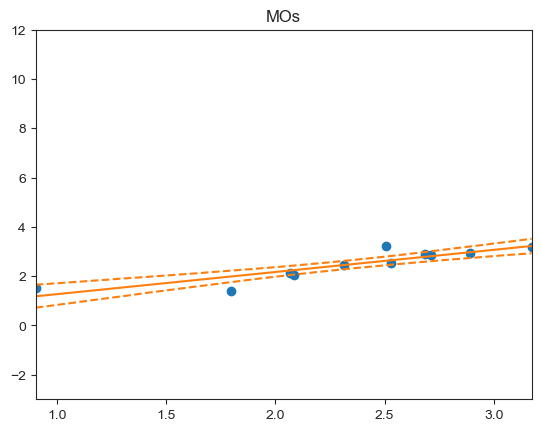

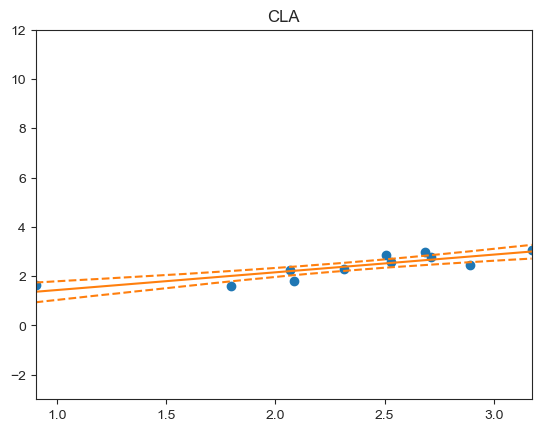

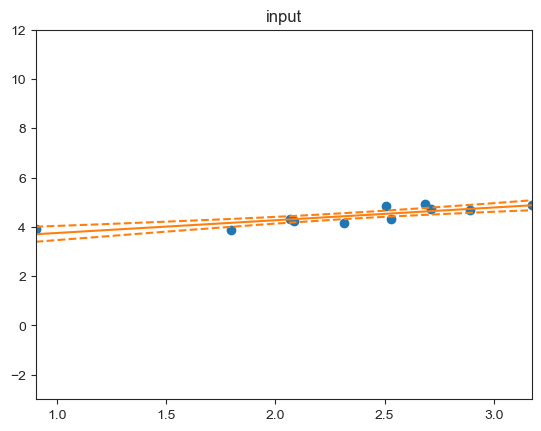

In [22]:
bstfn.plot_scatter_95bs(areas_with_pre, df_log_pm, 1, df_boot_int_pm, df_boot_slope_pm, 'target_PM', savepath_v1pm)